# Polynomial Regression Overfitting

In [45]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette("Set2")
import matplotlib.lines as lines
%matplotlib inline

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [112]:
# Functions
def plot_prediction(y_train,x_train,y_line,x_line):
    #plot data
    fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(16,8))
    plt.ylim(min(y_train), max(y_train))
    sns.scatterplot(np.array(x_train)[:,1],y_train)

    #plot prediciton line        
    plt.plot(x_line['x'],y_line, 'r-', lw=2)
    plt.title("Maximum X Power: {}".format(i),size=20)
    plt.xlabel('X',size=20)
    plt.ylabel('Y',size=20)
    
    plt.savefig('../figures/poly/pred_line{}.png'.format(i),format='png',dpi=150)
    
def plot_fit(y_train,pred_train,y_test,pred_test):
    #Plots of expected vs predicted 
    lim_min = min(y_train)- 10 
    lim_max = max(y_train) + 10

    plt.figure(figsize=(16, 8))

    #Train
    plt.subplot(121)
    plt.scatter(pred_train, y_train)
    plt.plot([lim_min, lim_max], [lim_min, lim_max], 'k-', color = 'b')

    plt.title("Training Set",size=20)
    plt.xlabel('Predicted',size=15)
    plt.ylabel('Actual',size=15)
    plt.xlim(lim_min,lim_max)
    plt.ylim(lim_min,lim_max)

    #Test
    plt.subplot(122)
    plt.scatter(pred_test, y_test)
    plt.plot([lim_min, lim_max], [lim_min, lim_max], 'k-', color = 'b')

    plt.title("Test Set",size=20)
    plt.xlabel('Predicted',size=15)
    plt.ylabel('Actual',size=15)
    plt.xlim(lim_min,lim_max)
    plt.ylim(lim_min,lim_max)
    
    plt.savefig('../figures/poly/fit{}.png'.format(i),format='png',dpi=150)

def MSE(y_train,pred_train,y_test,pred_test):
    #MSE
    train_mse = mean_squared_error(y_train, pred_train)
    test_mse = mean_squared_error(y_test, pred_test)
    if i == 1: 
        print("MSE")
        print("___")
    print("{}) Train:{} Test:{}".format(i,round(train_mse), round(test_mse)))
    
    return train_mse, test_mse
    
def regression(x,y,n):
    
    x = sm.add_constant(x)
    
    #Prediction line data 
    x_line = np.linspace(min(x['x']), max(x['x']), 1000)
    x_line = pd.DataFrame(data=x_line, columns=["x"])
    x_line  = sm.add_constant(x_line)
    
    for i in range(1,n+1):
        if i != 1:
            x['x{}'.format(i)] = x['x']**i

            x_line['x{}'.format(i)] = x_line['x']**i
     
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = 101)

    #fit model 
    model = sm.OLS(y_train,x_train).fit()
    
    #Predictions
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    y_line = model.predict(x_line)
    
    #Plots and MSE
    plot_prediction(y_train,x_train,y_line,x_line)
    plot_fit(y_train,pred_train,y_test,pred_test)
    train_mse, test_mse = MSE(y_train,pred_train,y_test,pred_test)

    
    return model,train_mse, test_mse   

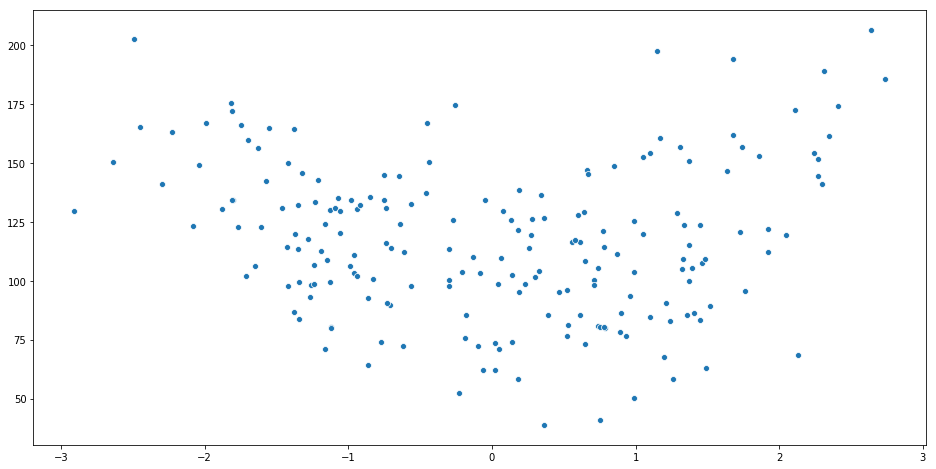

In [108]:
#Generate data
a = 200
x = [round(x,2) for x in np.linspace(-2, 2, a)+ 0.5*np.random.randn(a)]

x = np.array(x)
noise = 10*np.random.randn(a)
y = 2*x**3+(10)*x**(2)-(15/2)*x+100 + 3*noise

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(16,8))
sns.scatterplot(y = y,x = x)

data = pd.DataFrame(data=x, columns=["x"])
data['y'] = y

In [168]:
data.to_csv('../data/house_price.csv')
data = pd.read_csv('../data/house_price.csv')

MSE
___
1) Train:1225.0 Test:681.0
2) Train:860.0 Test:629.0
3) Train:837.0 Test:624.0
4) Train:831.0 Test:666.0
5) Train:826.0 Test:649.0
6) Train:824.0 Test:631.0
7) Train:807.0 Test:673.0
8) Train:807.0 Test:673.0
9) Train:806.0 Test:662.0
10) Train:801.0 Test:694.0
11) Train:800.0 Test:693.0
12) Train:770.0 Test:906.0
13) Train:764.0 Test:1257.0
14) Train:752.0 Test:739.0
15) Train:751.0 Test:784.0
16) Train:751.0 Test:775.0
17) Train:737.0 Test:4768.0
18) Train:737.0 Test:3718.0
19) Train:730.0 Test:850.0
20) Train:703.0 Test:22589.0
21) Train:703.0 Test:24483.0
22) Train:696.0 Test:4424.0
23) Train:686.0 Test:191068.0
24) Train:672.0 Test:2775746.0
25) Train:670.0 Test:5536700.0
26) Train:666.0 Test:23908849.0
27) Train:666.0 Test:17373490.0
28) Train:678.0 Test:84566296.0
29) Train:678.0 Test:60351875.0
30) Train:696.0 Test:71787151.0


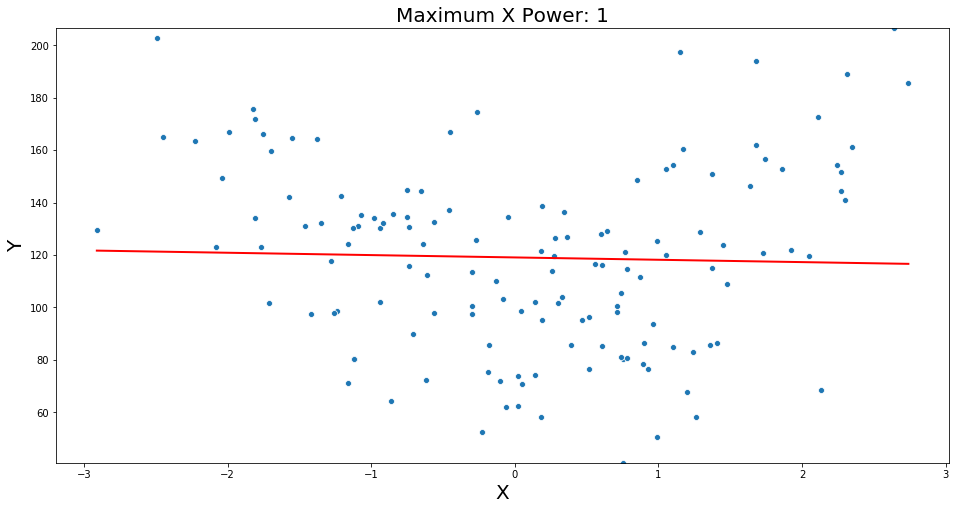

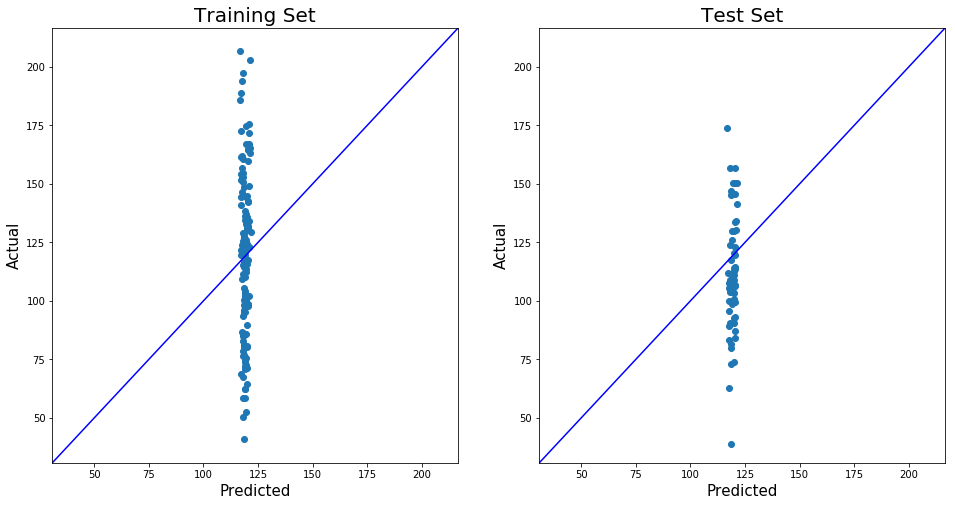

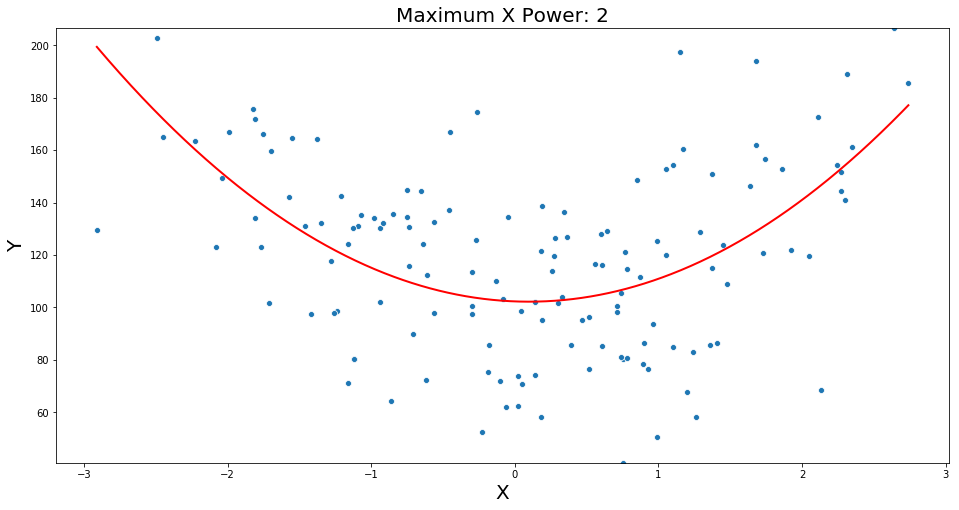

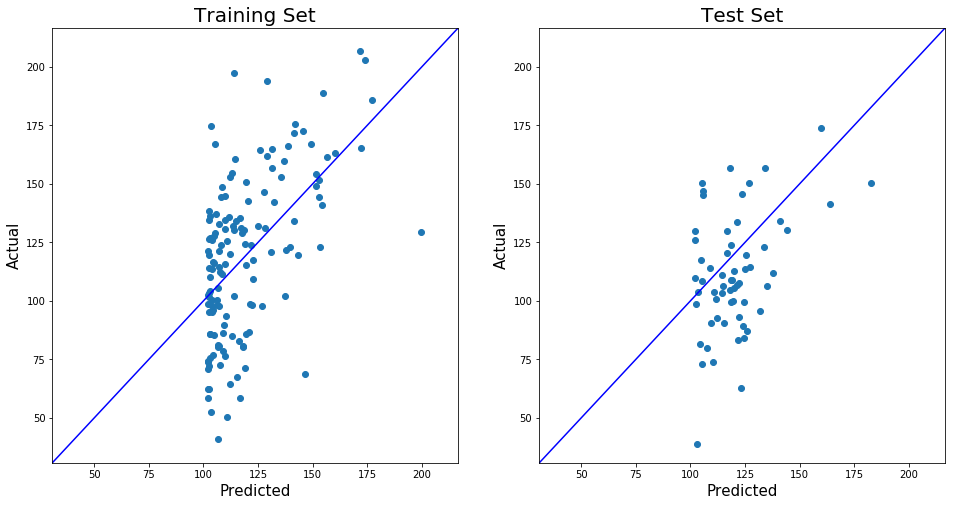

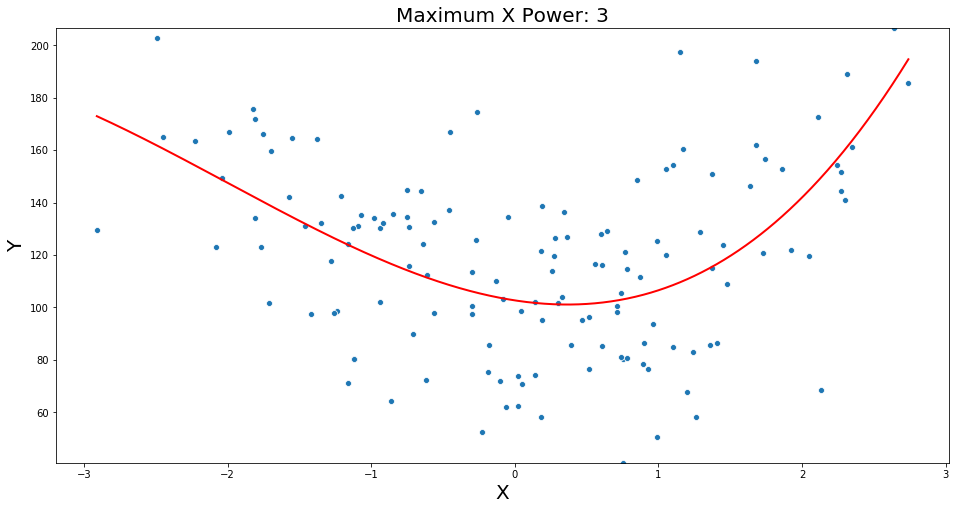

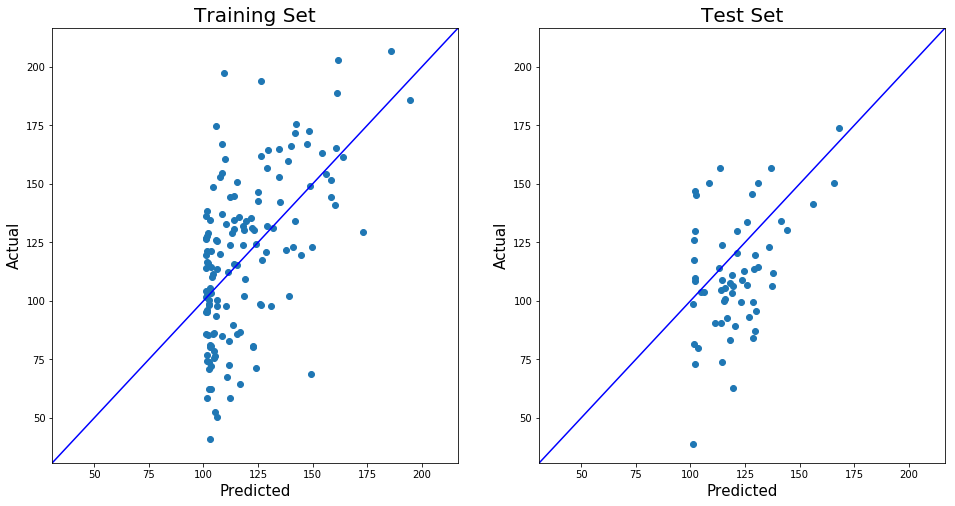

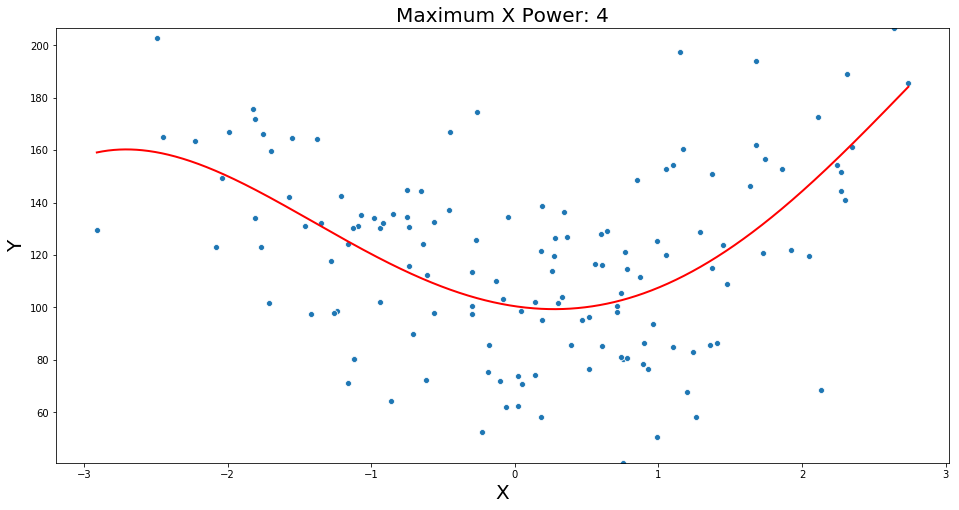

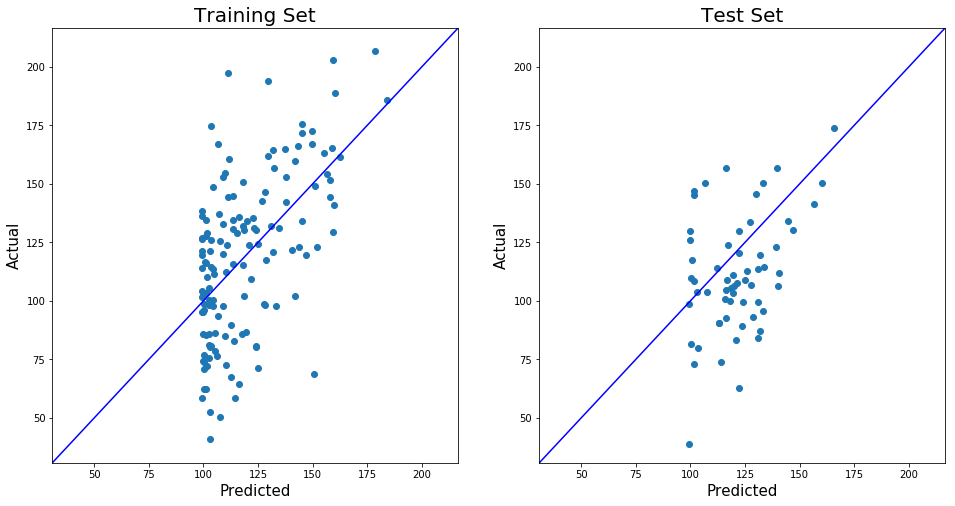

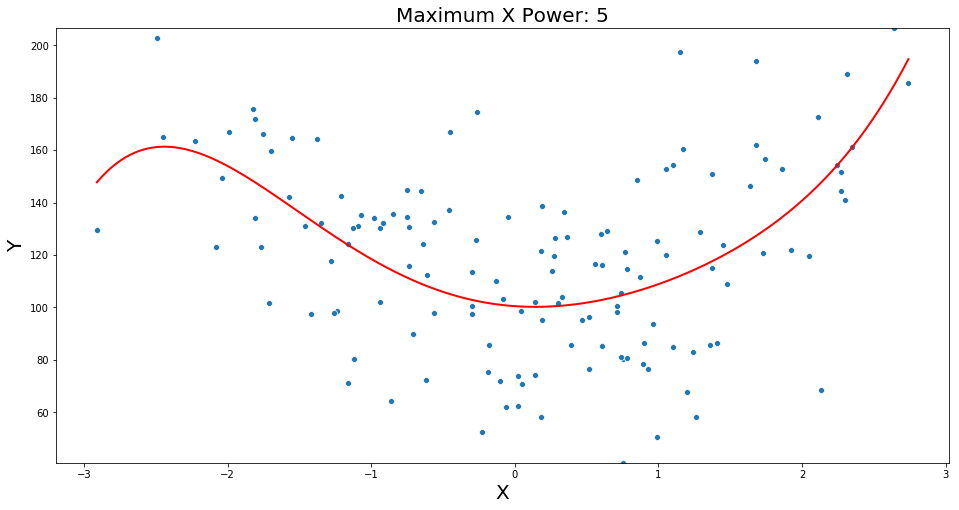

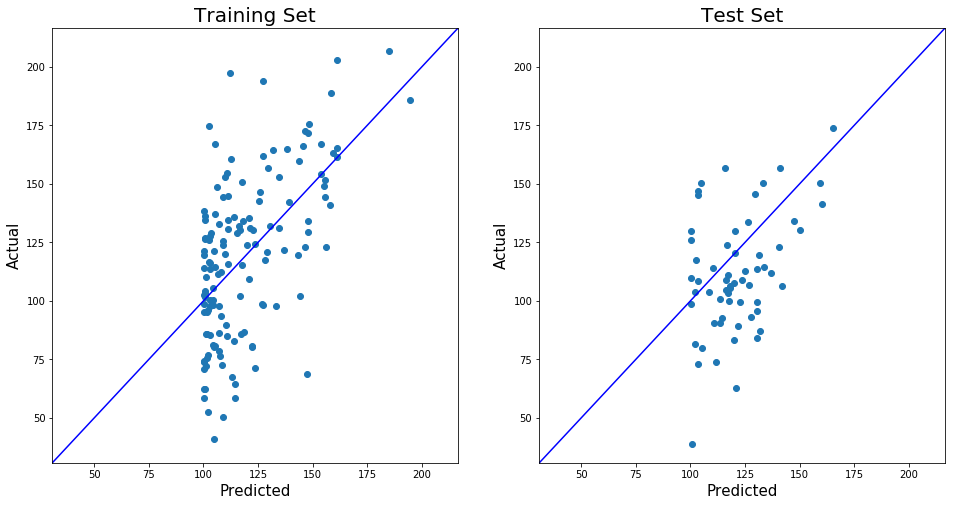

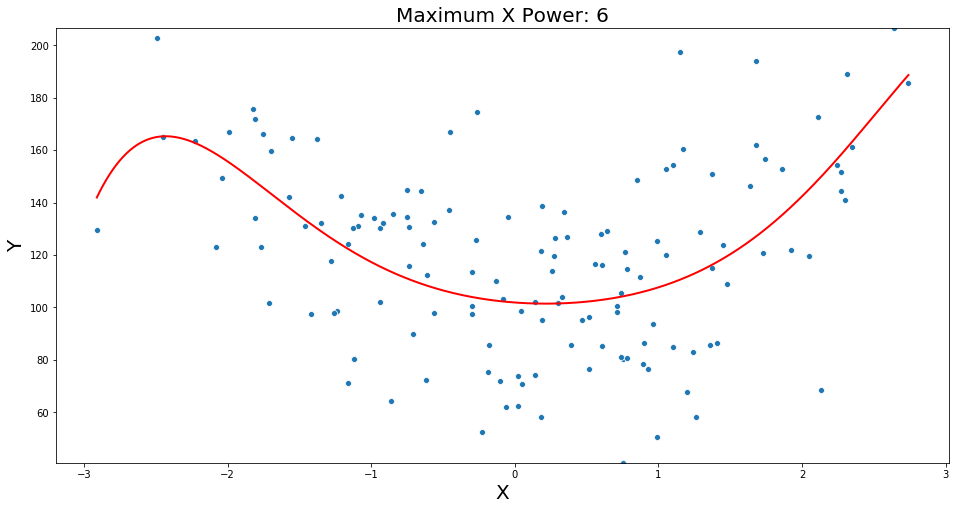

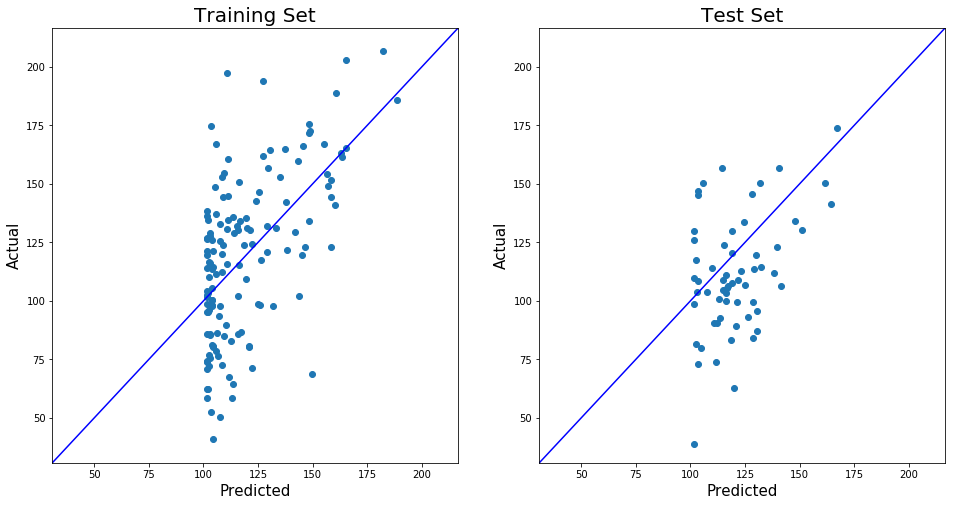

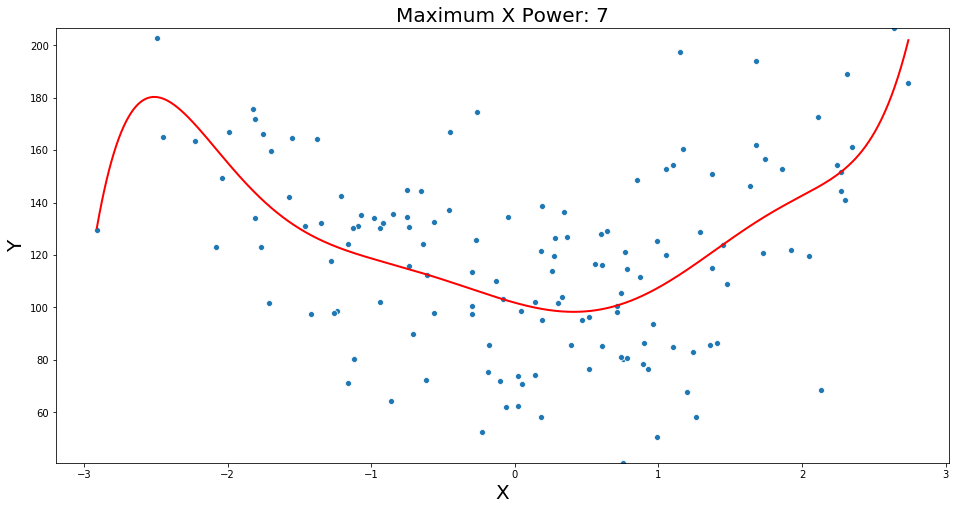

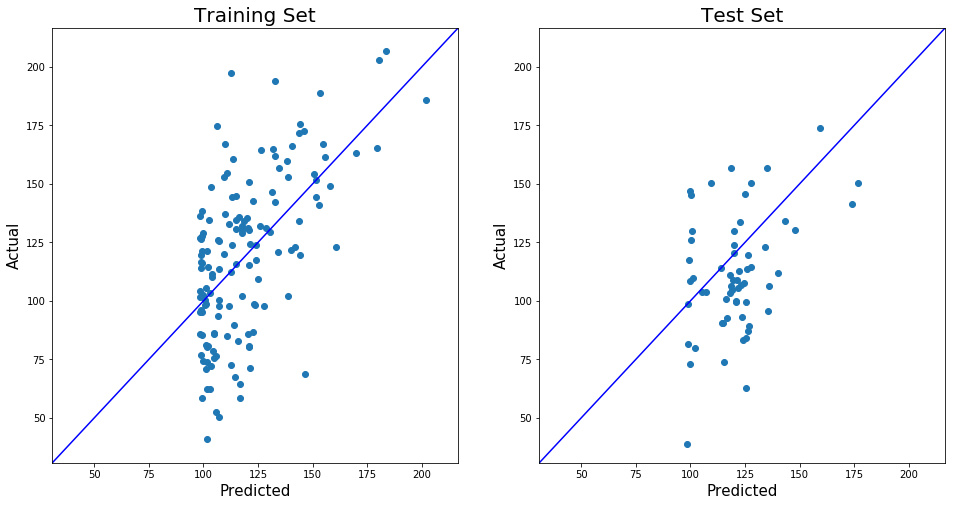

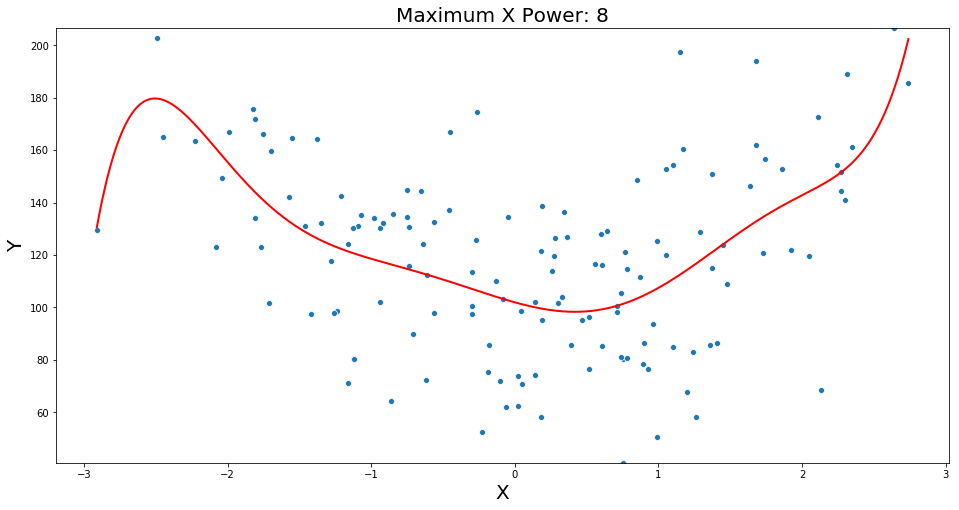

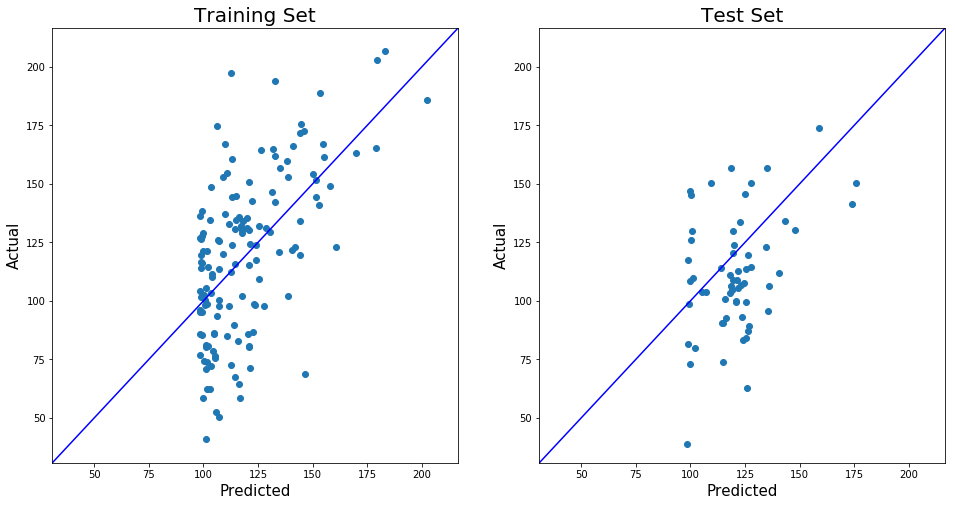

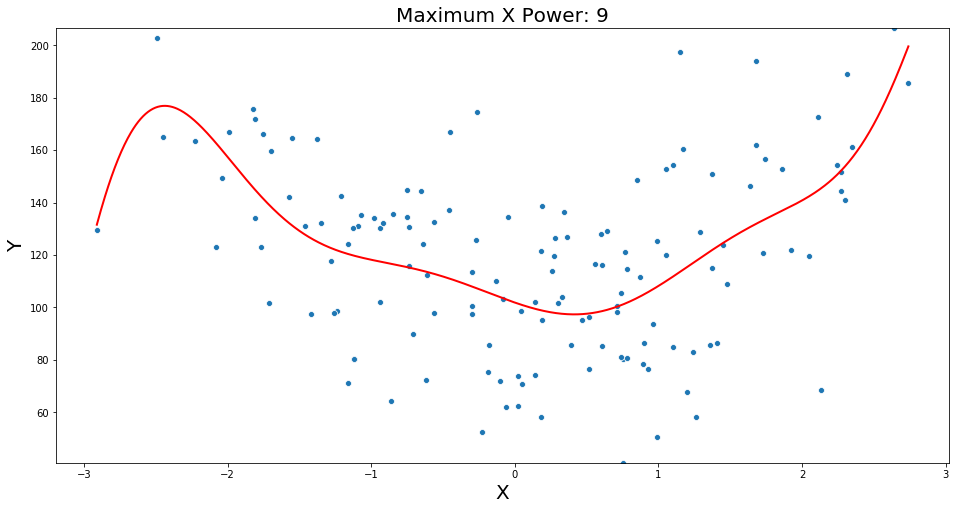

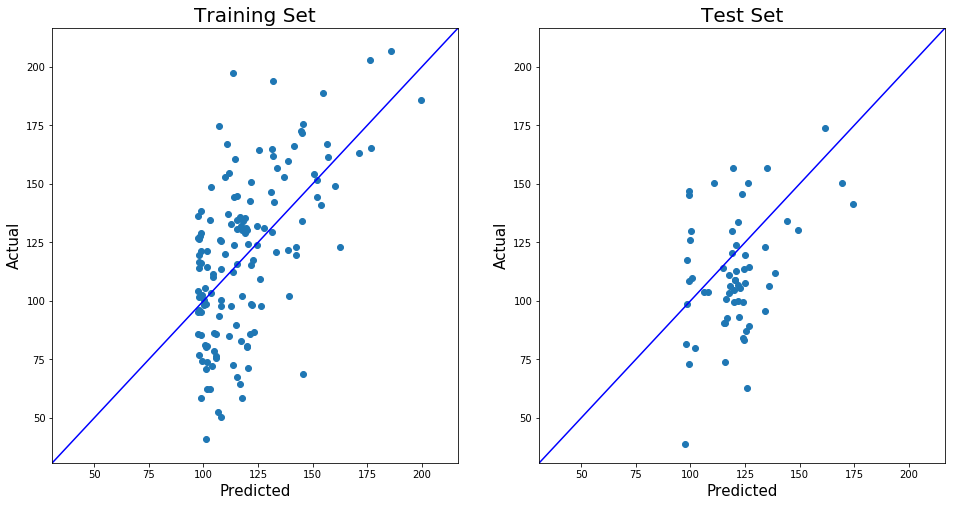

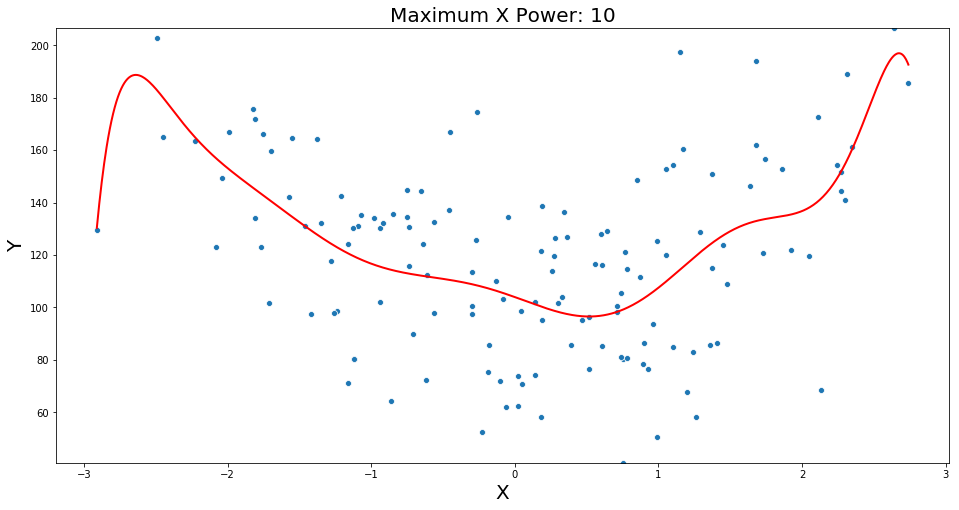

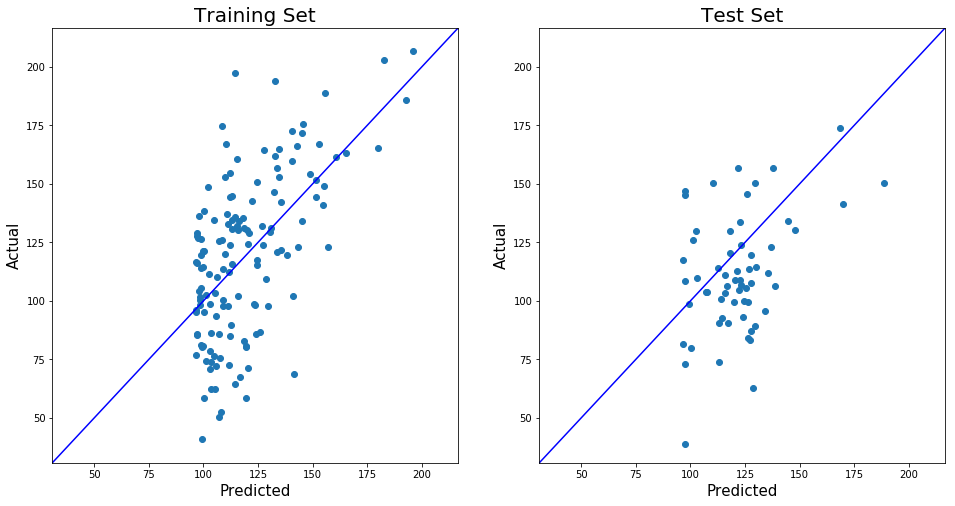

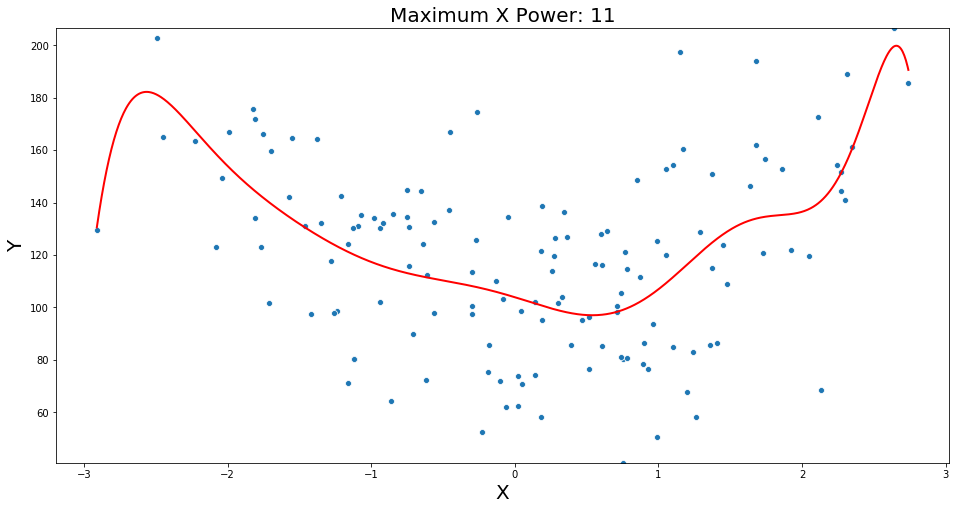

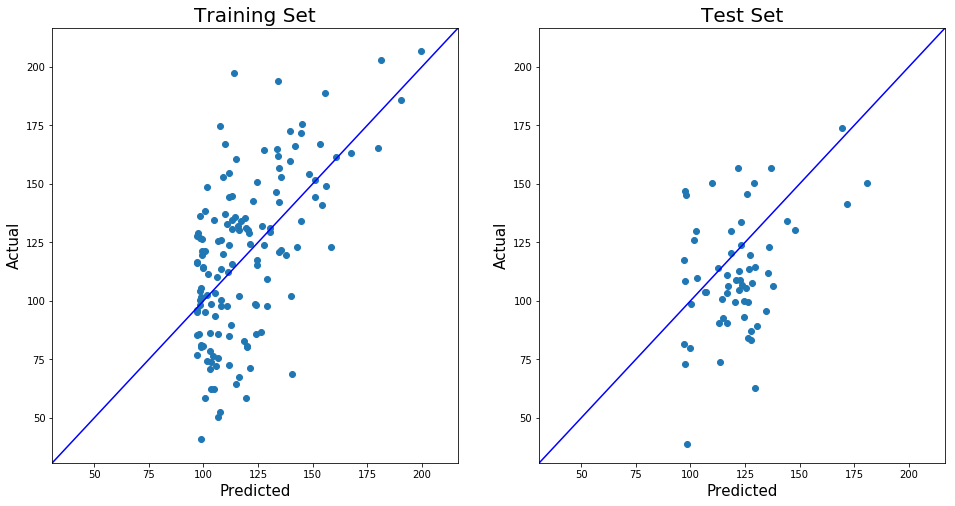

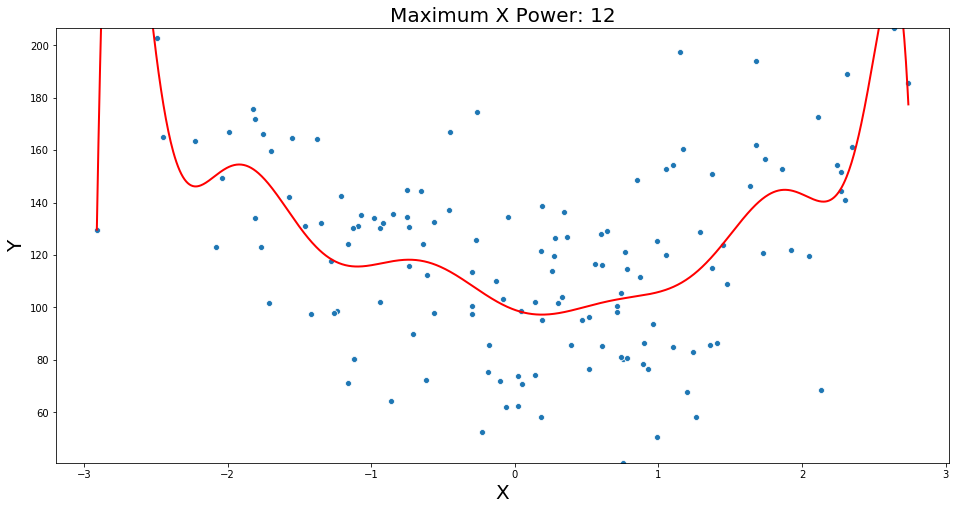

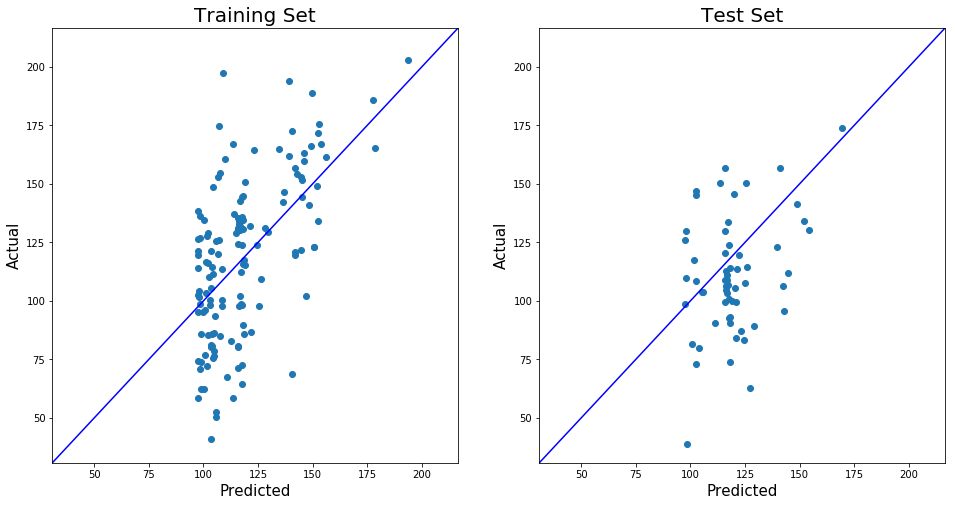

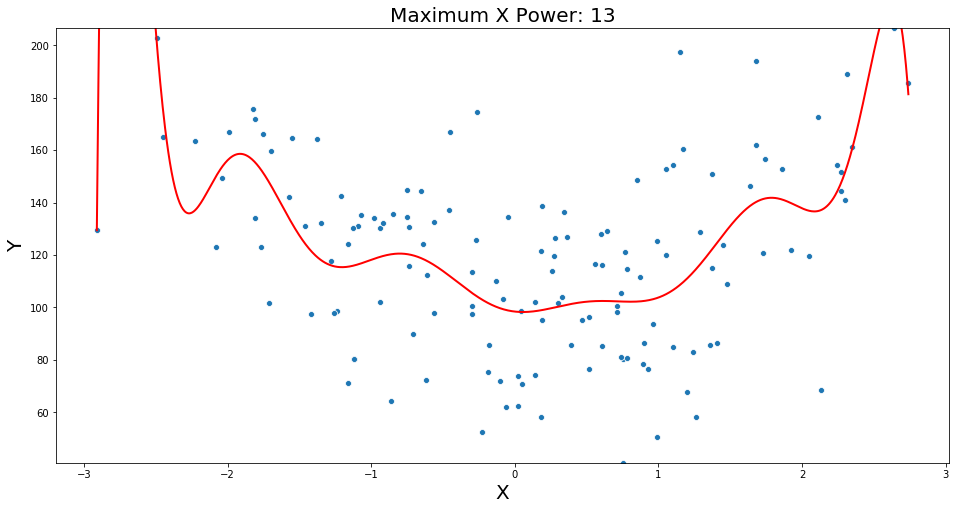

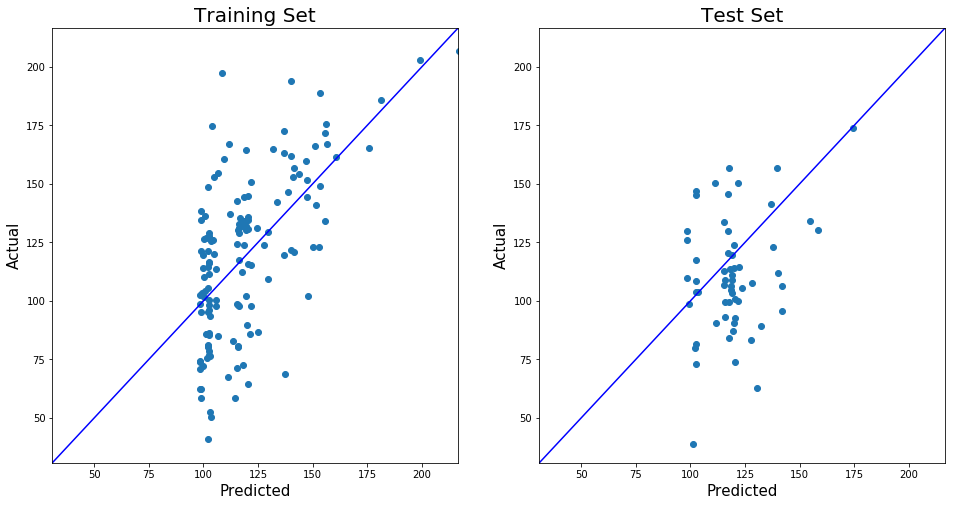

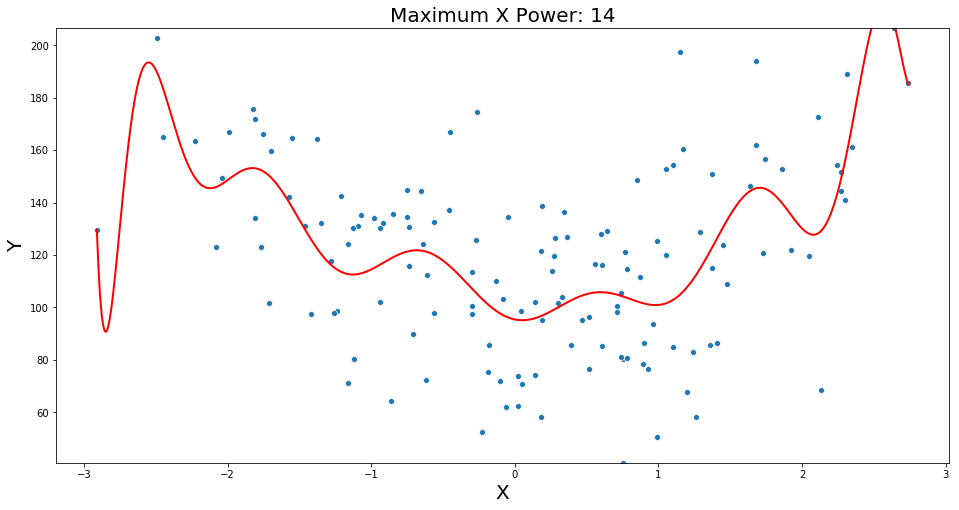

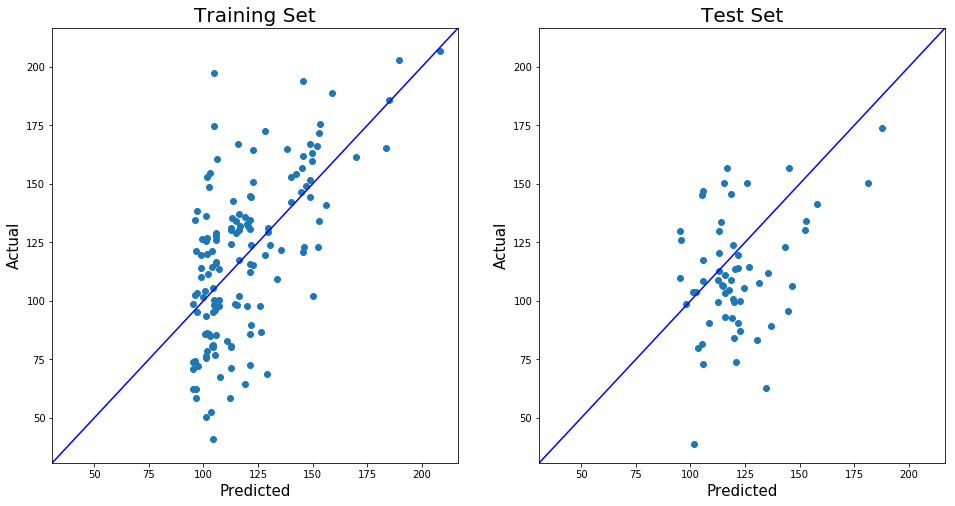

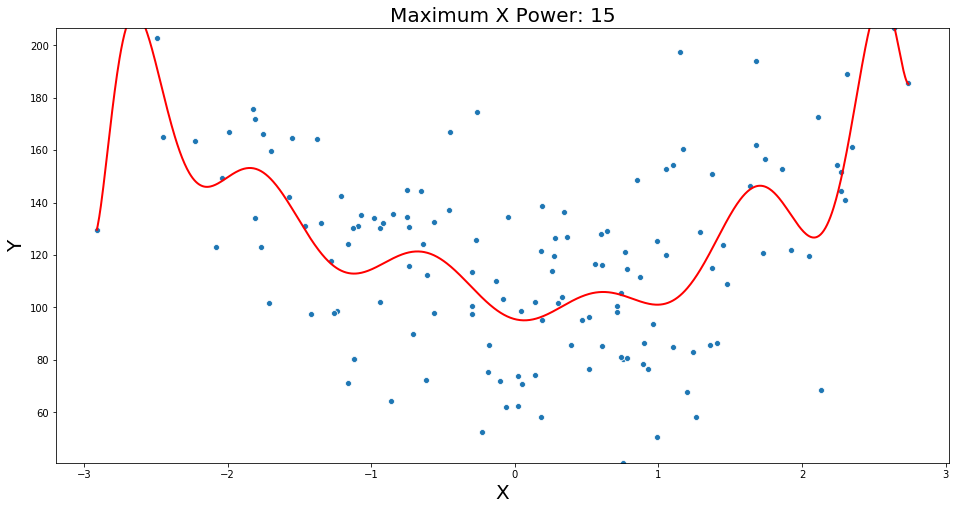

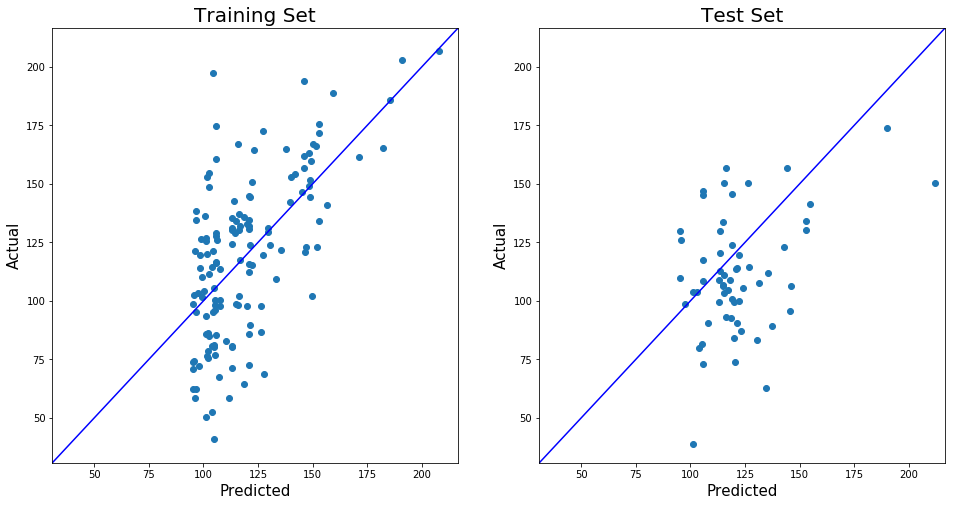

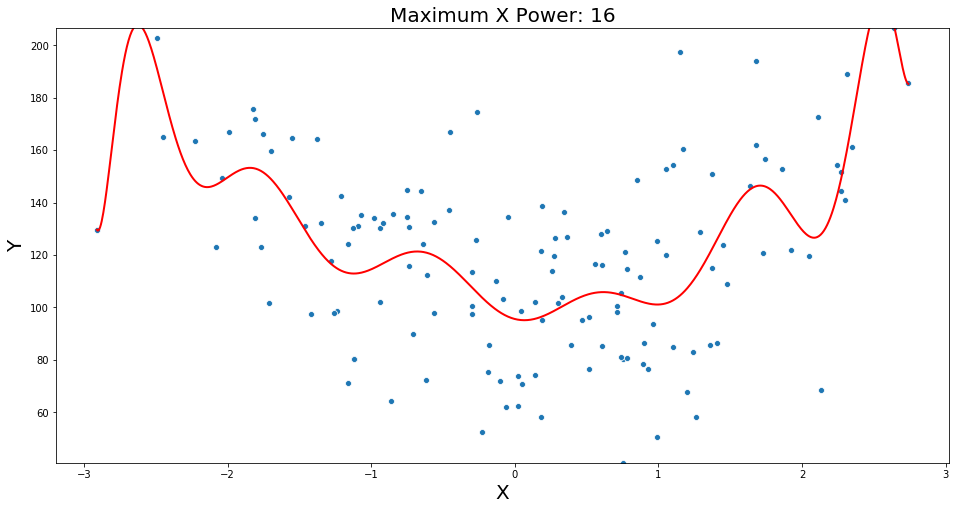

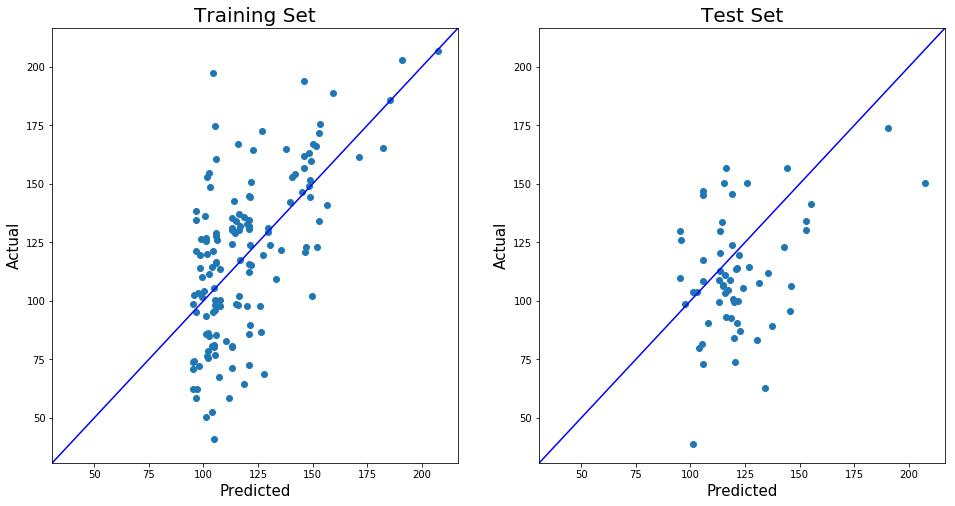

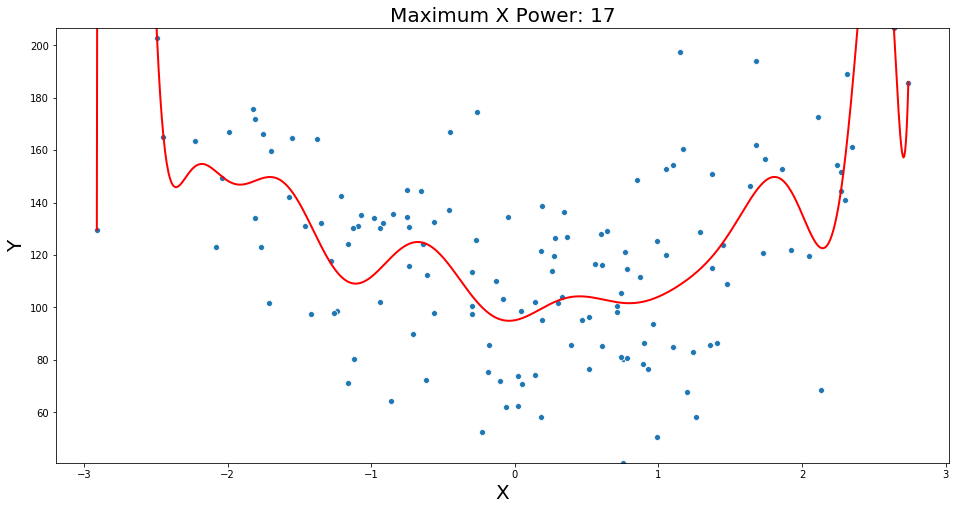

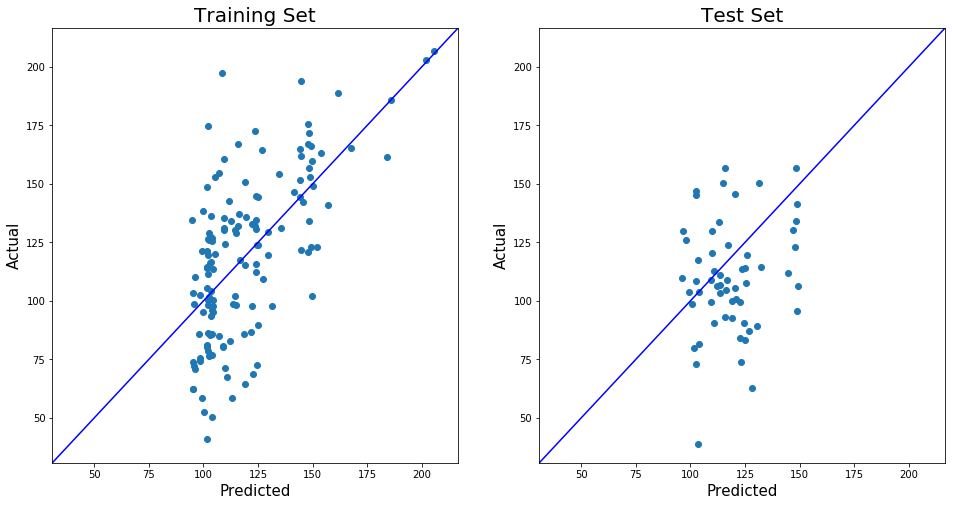

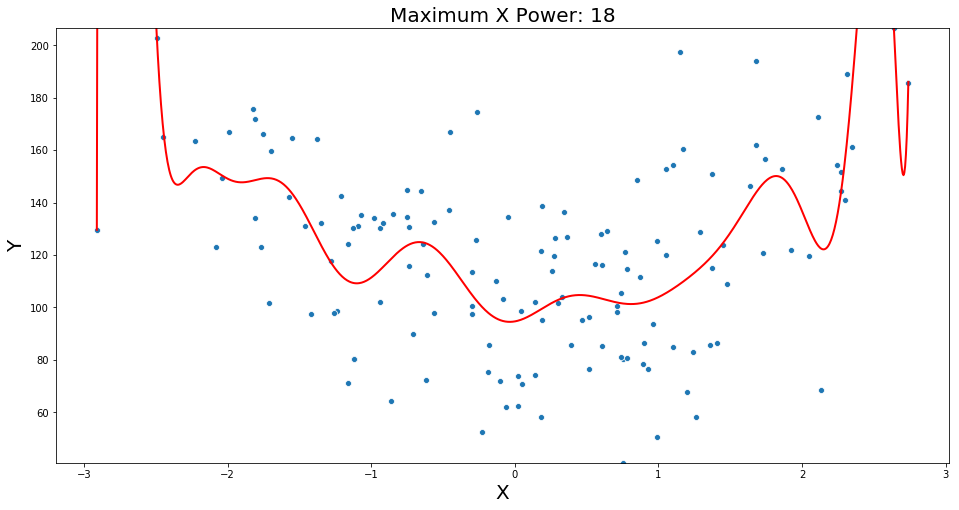

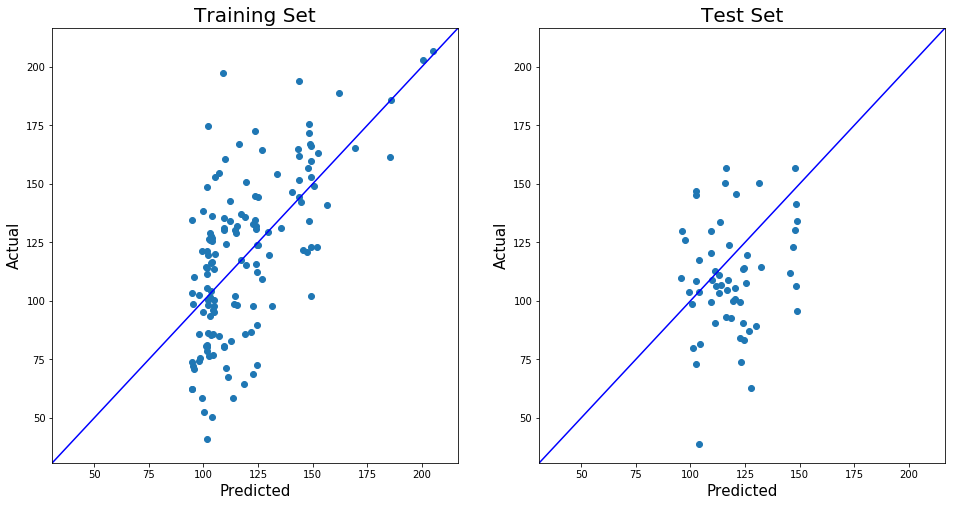

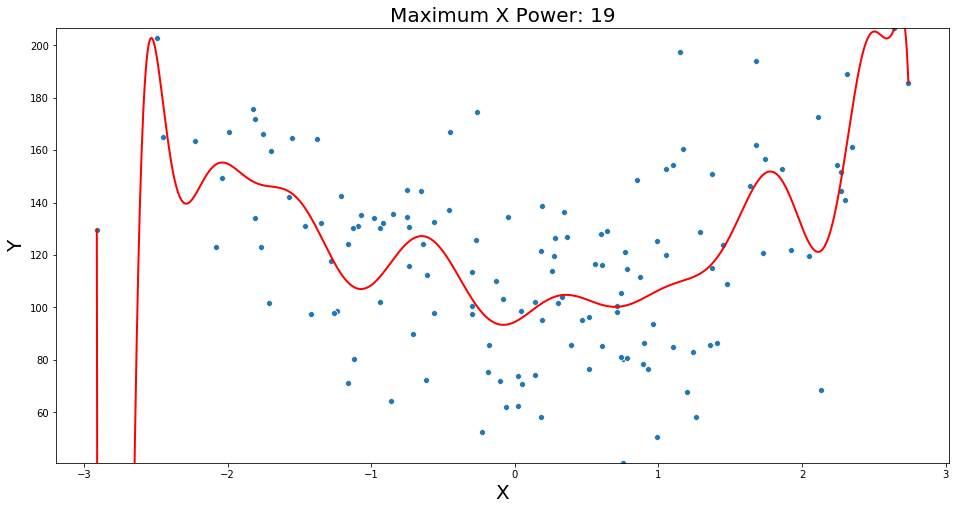

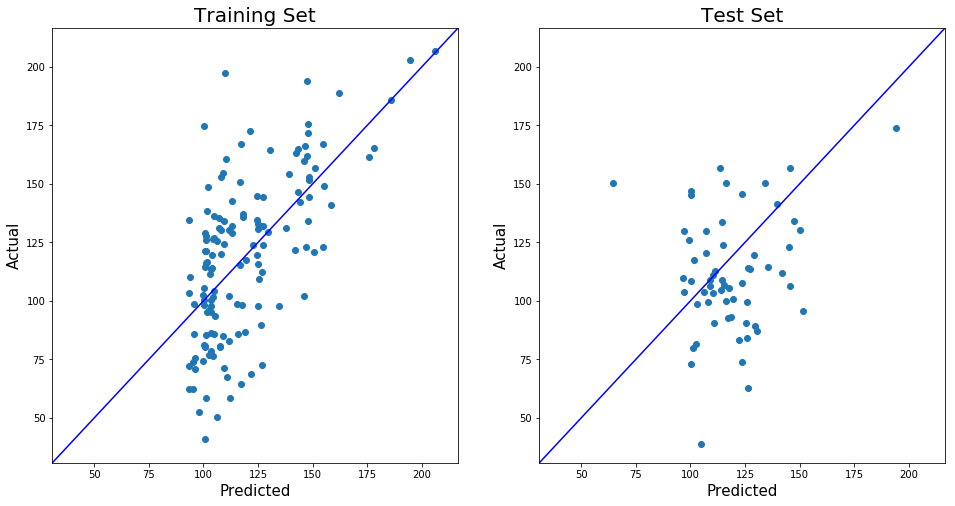

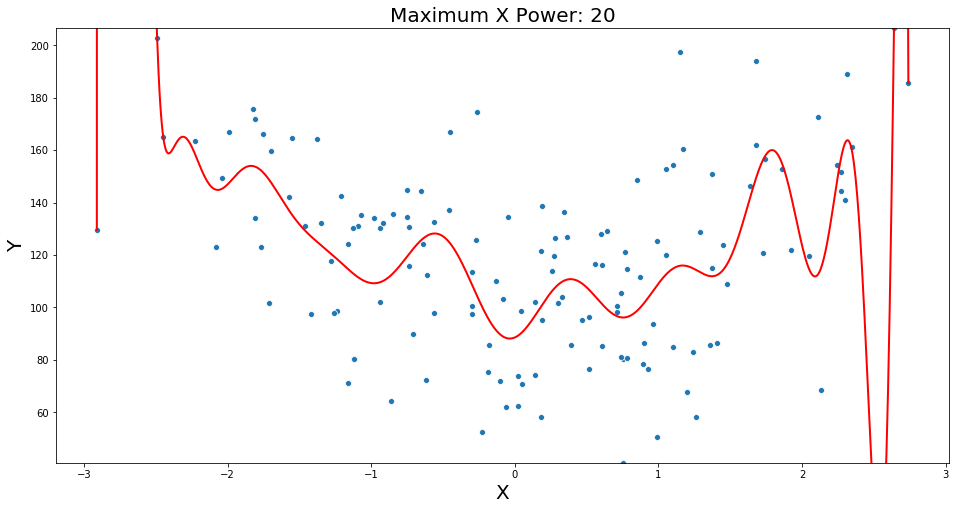

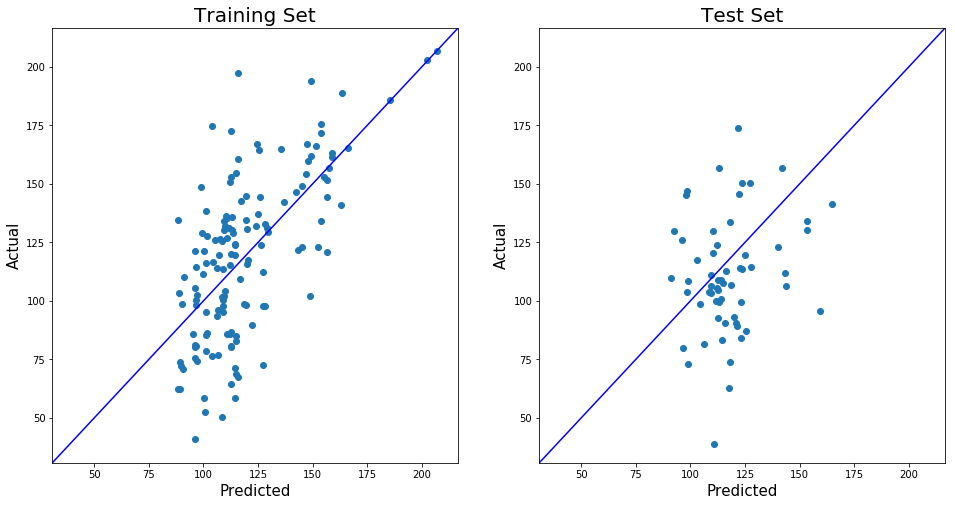

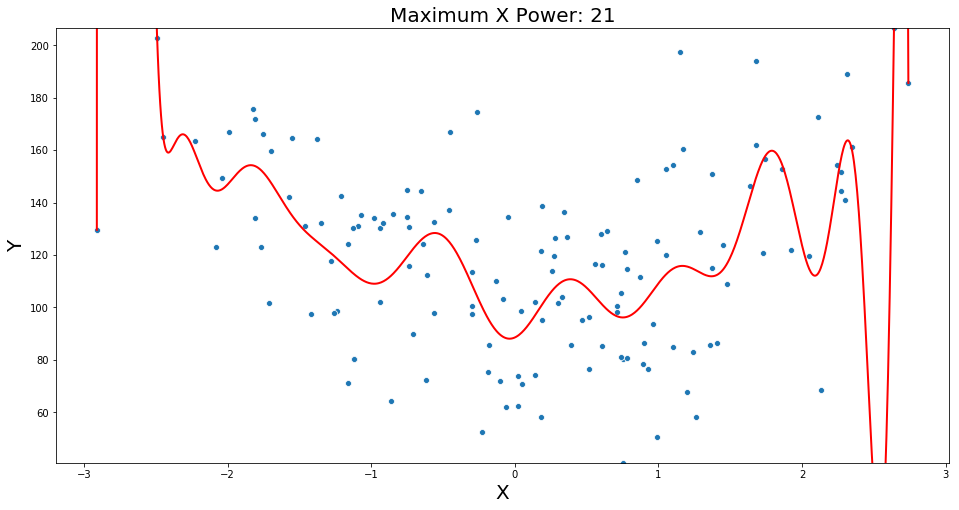

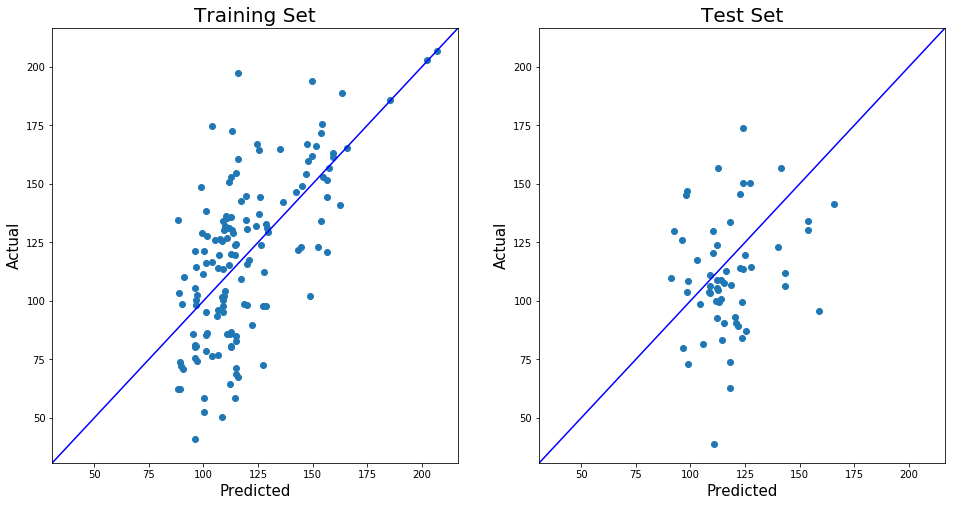

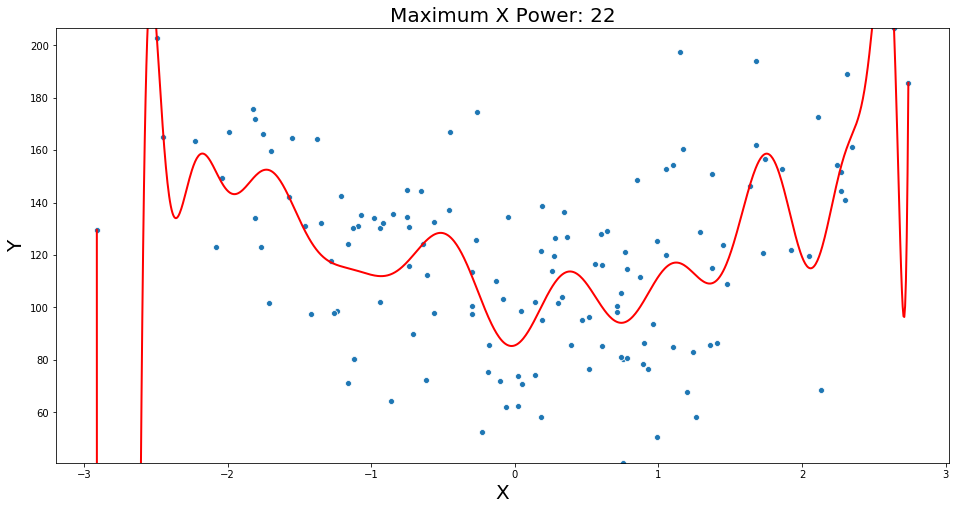

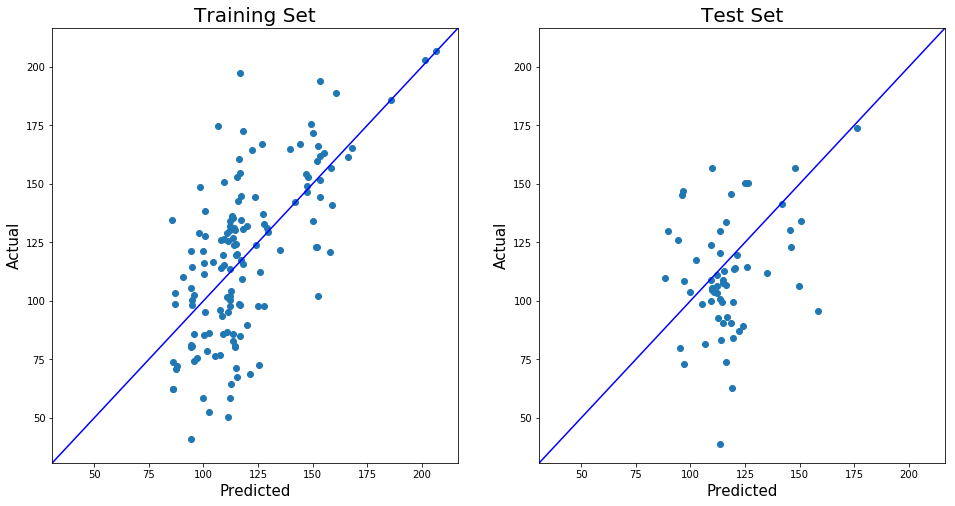

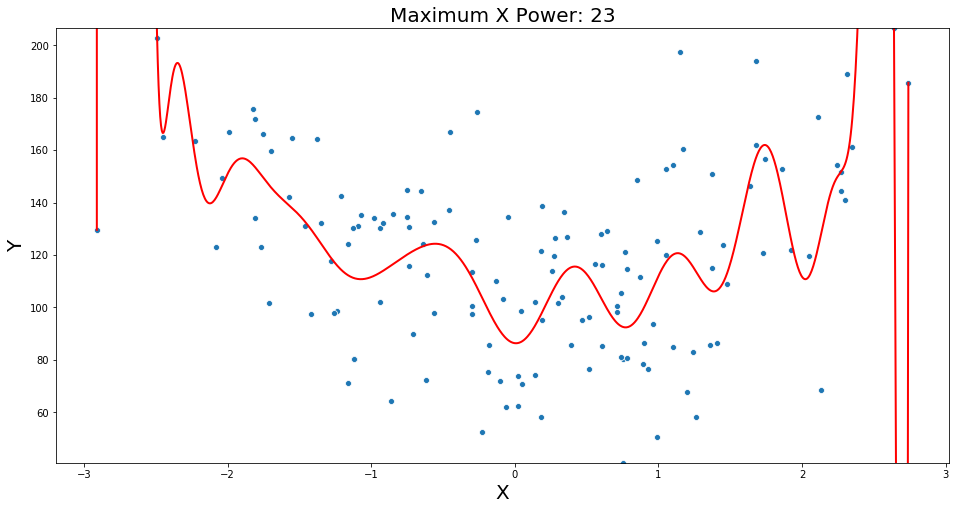

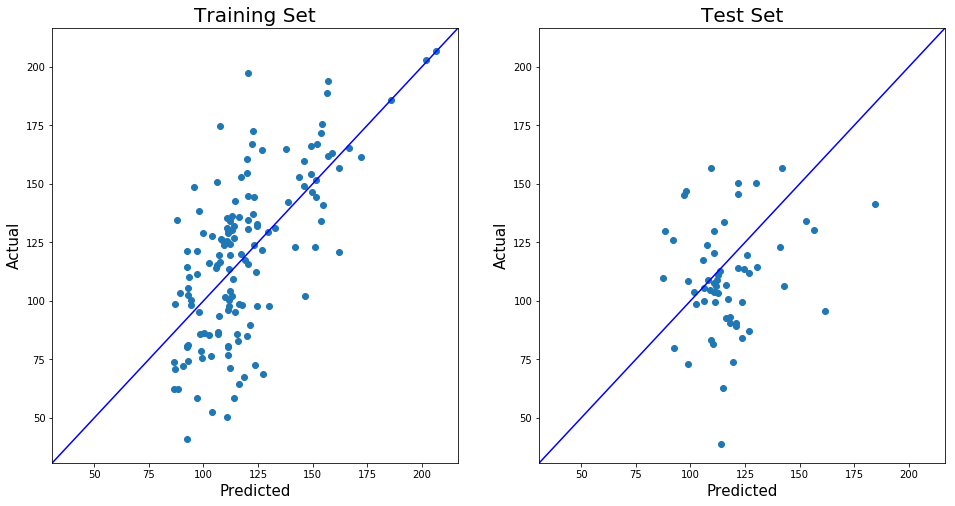

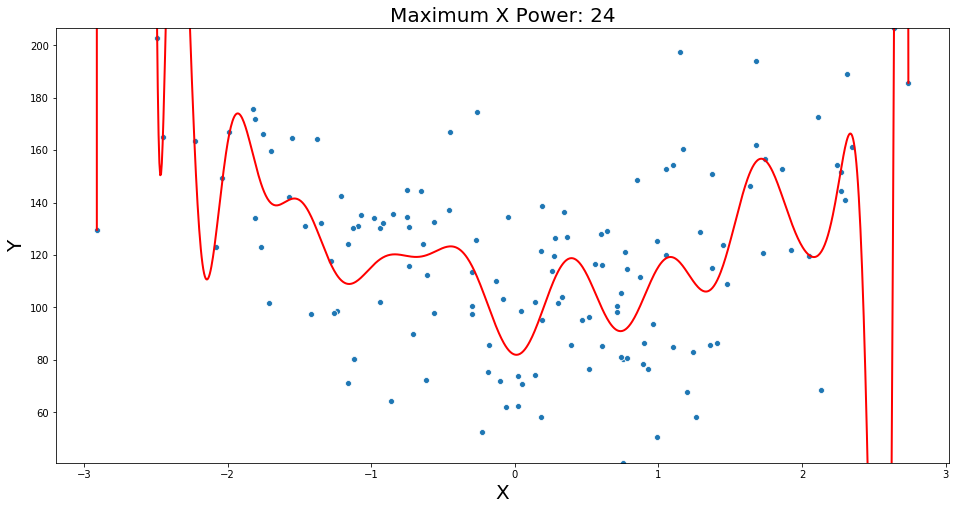

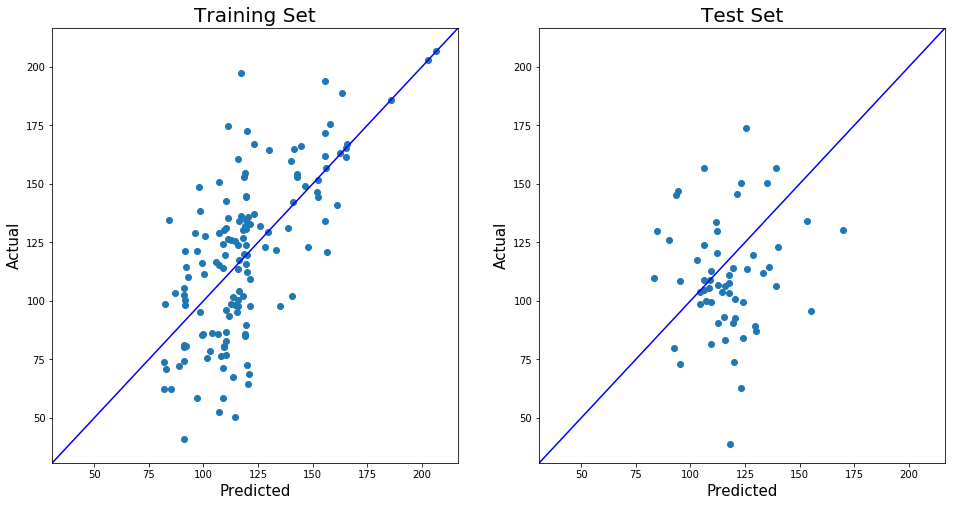

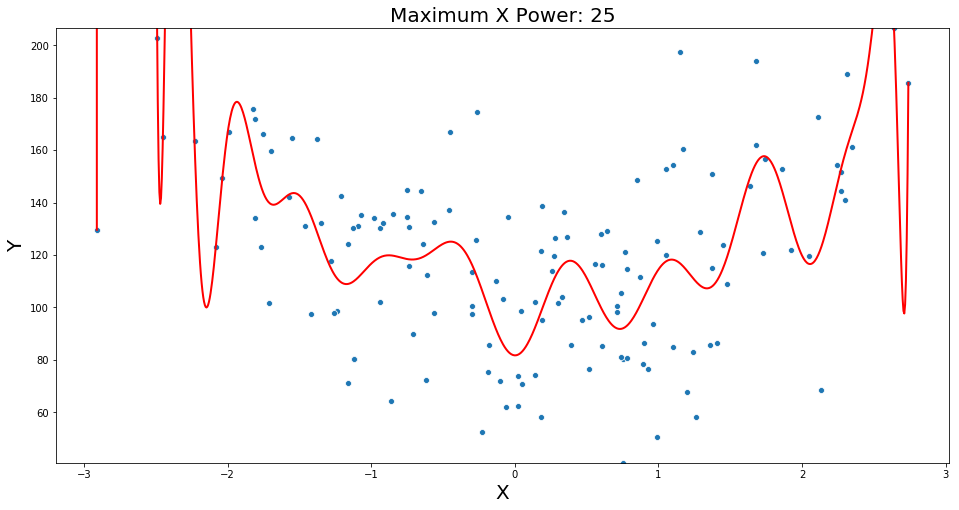

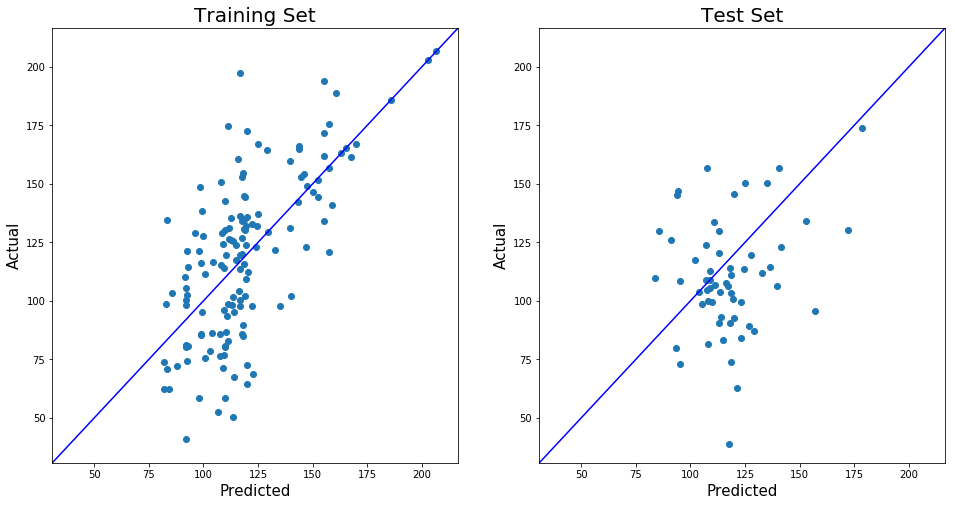

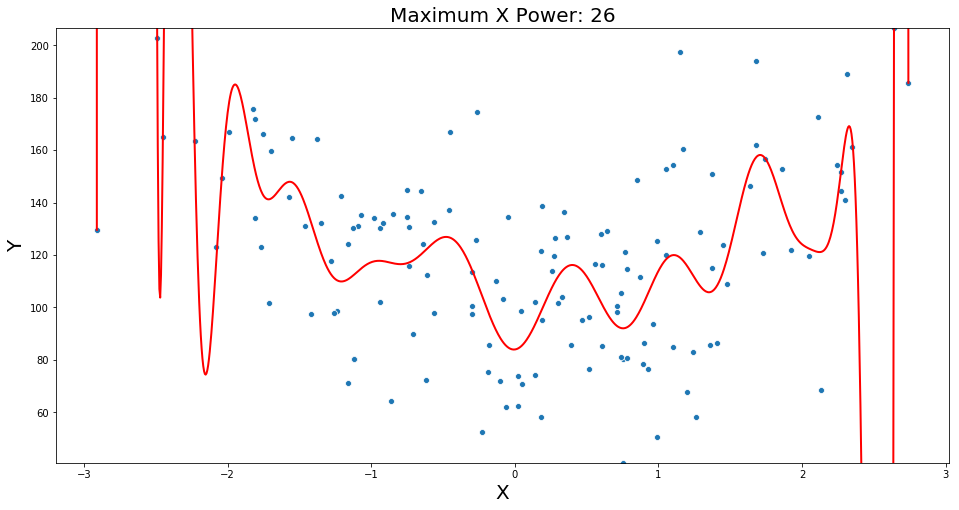

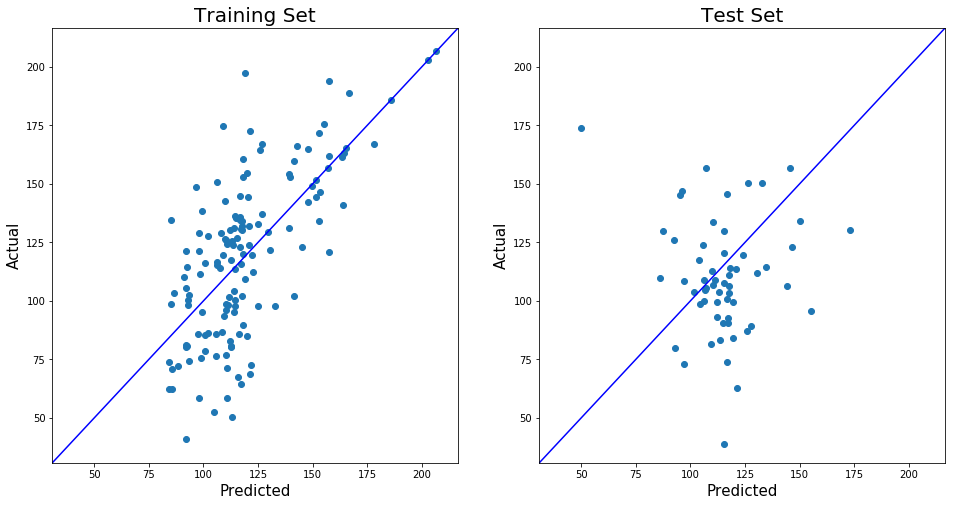

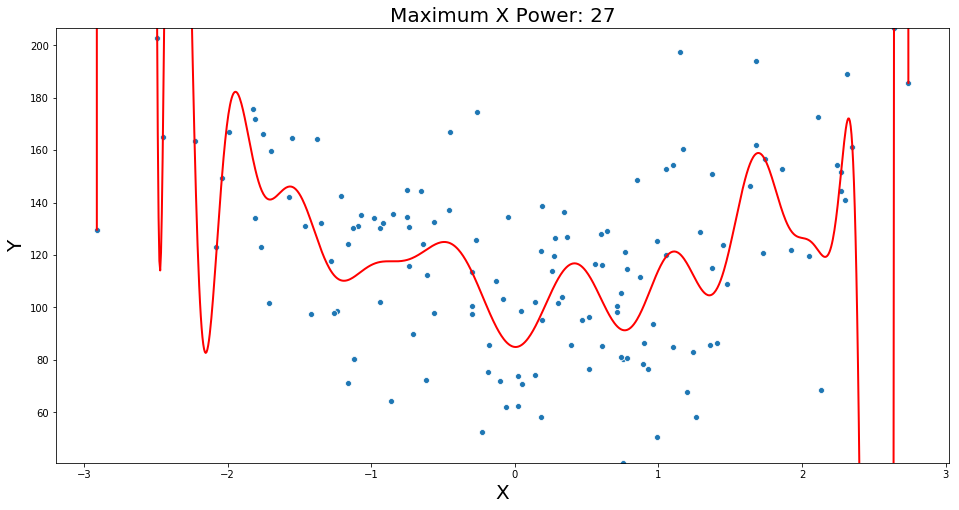

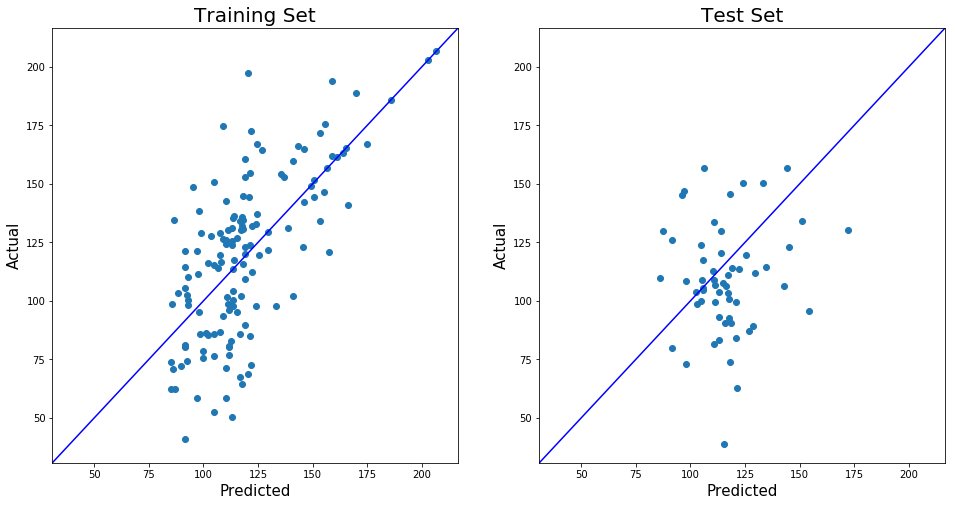

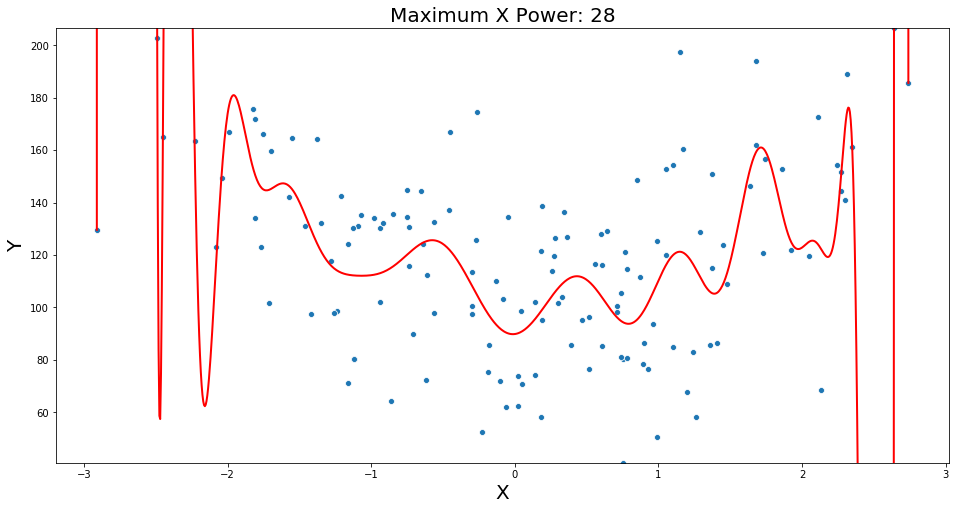

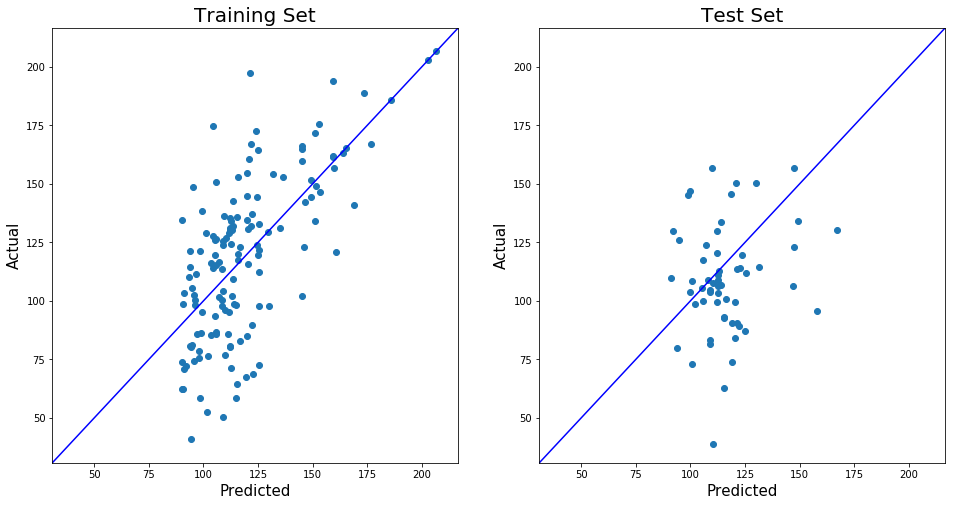

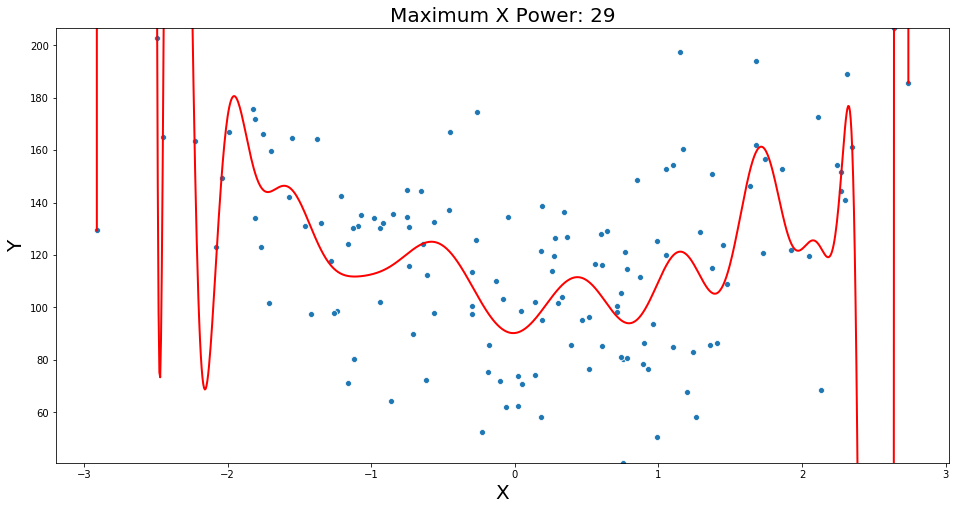

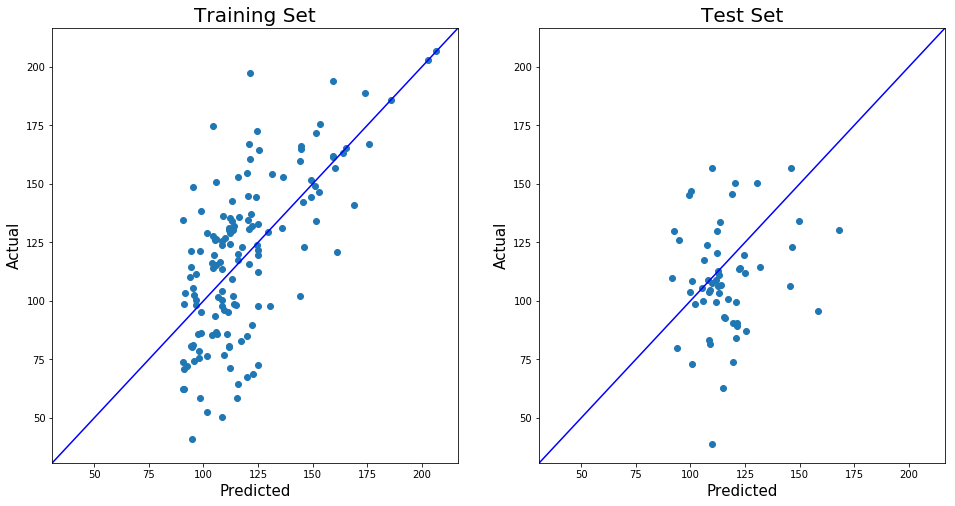

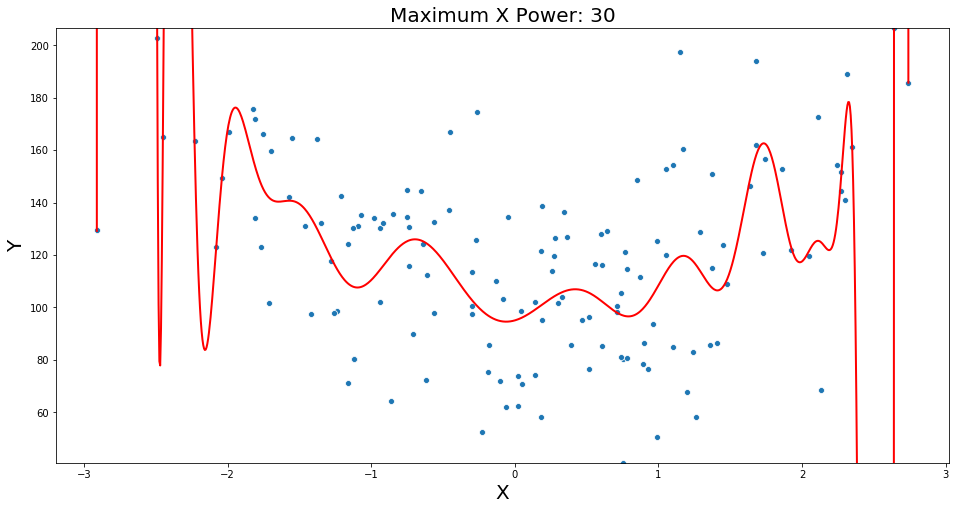

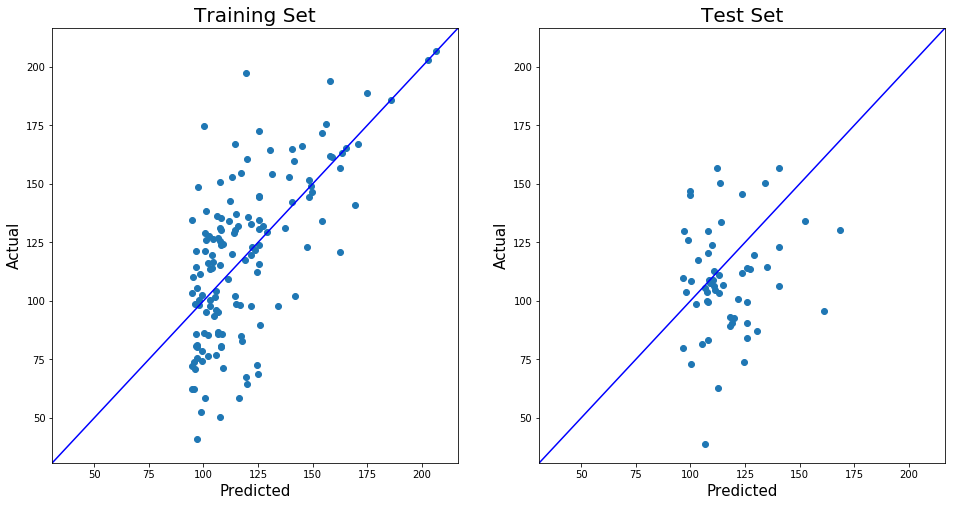

In [115]:
from math import sqrt
x = data['x']
y = data['y']

train = []
test = []
n = []
for i in range(1,31):
    model, train_mse, test_mse = regression(x,y,i)
    train.append(train_mse)
    test.append(test_mse)
    n.append(i)

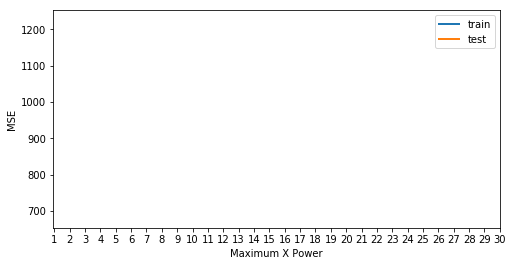

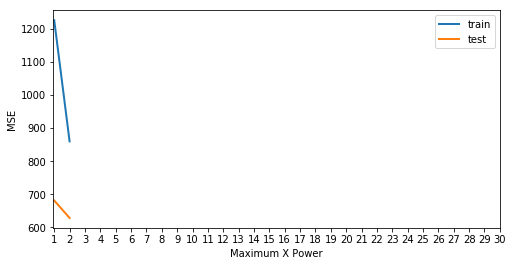

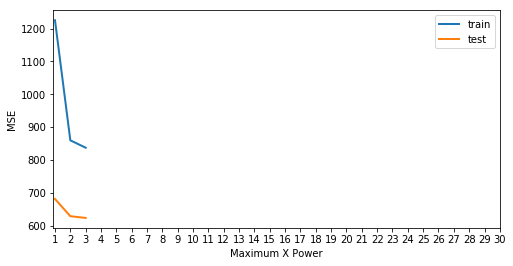

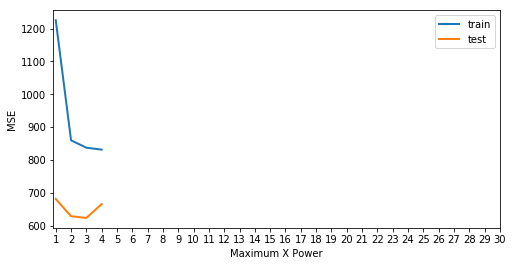

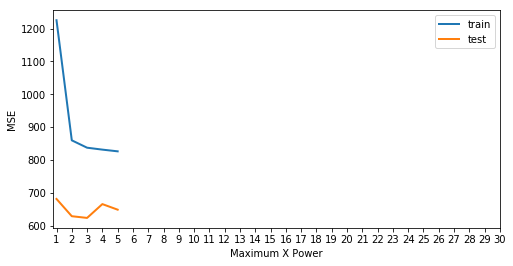

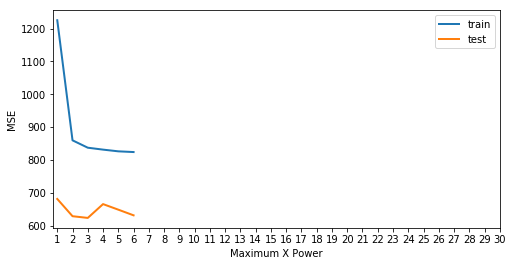

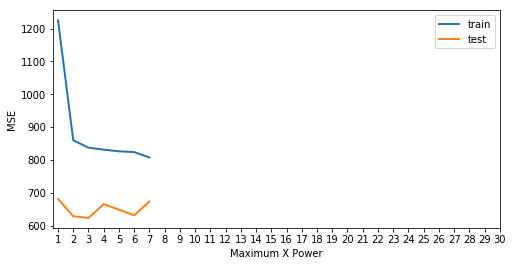

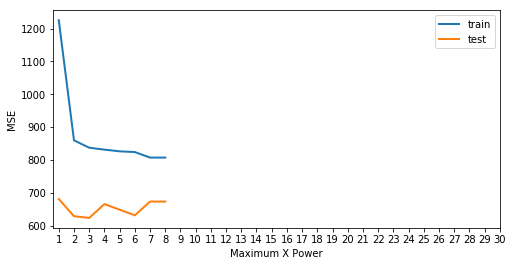

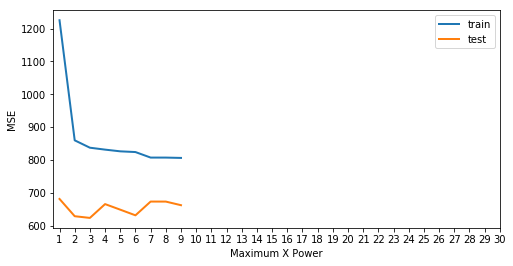

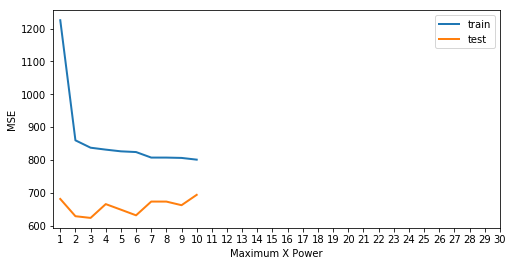

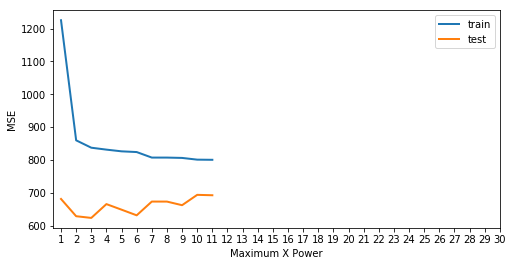

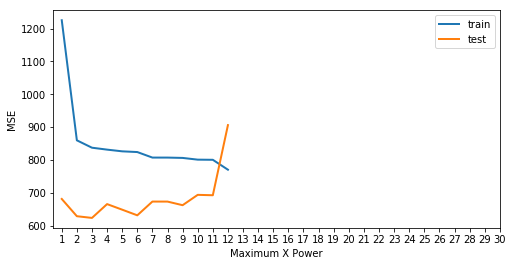

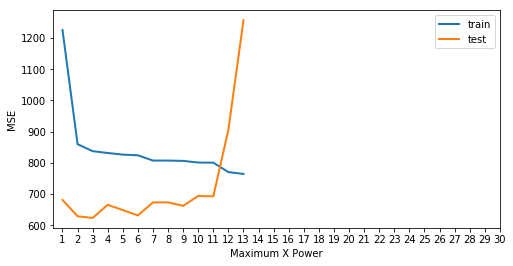

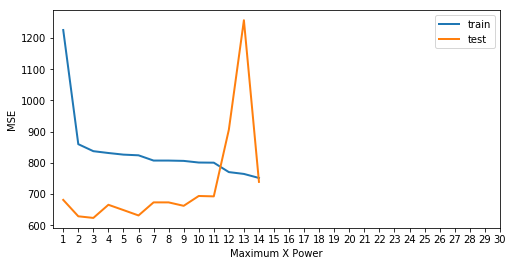

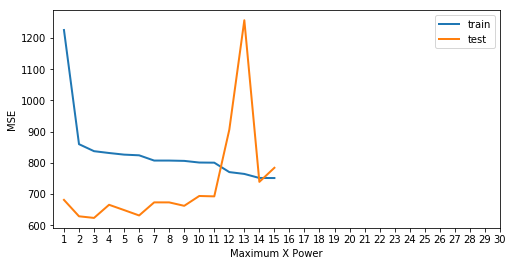

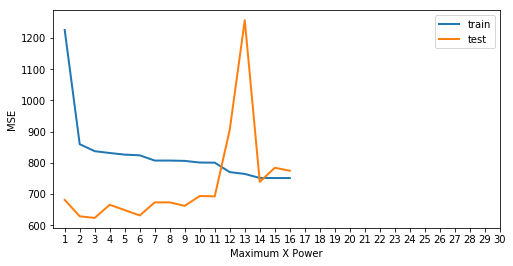

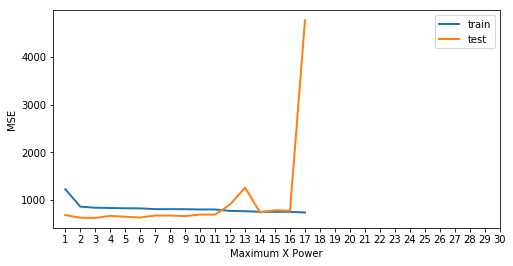

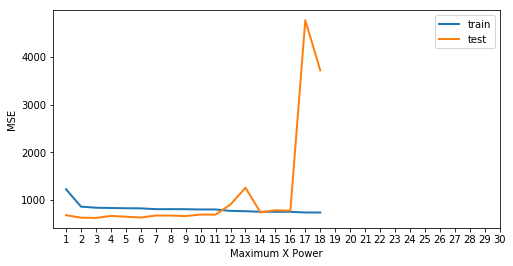

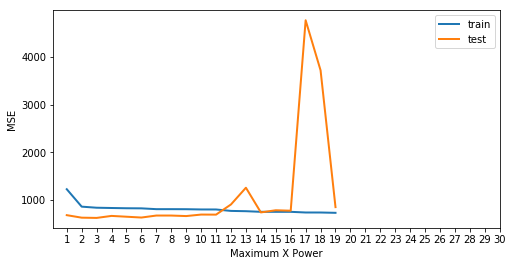

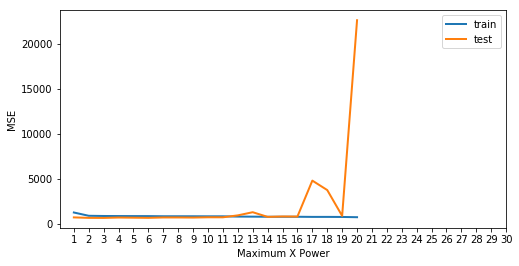

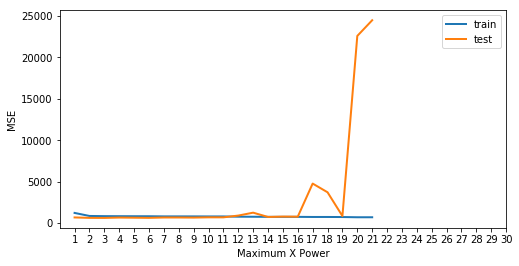

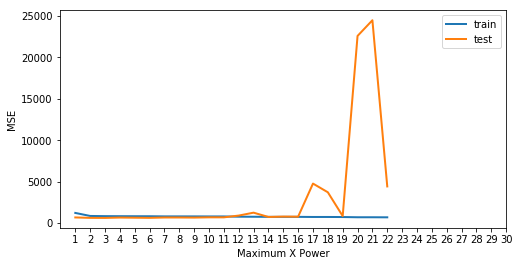

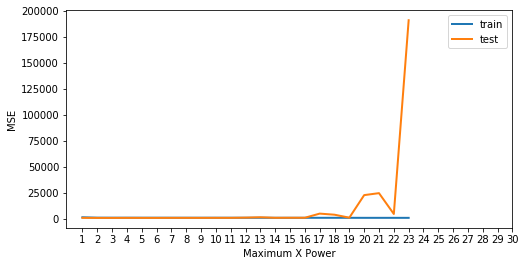

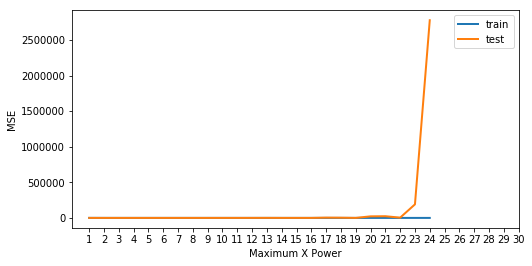

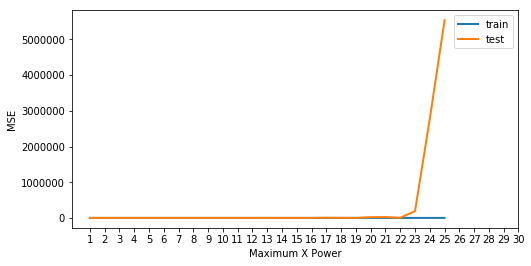

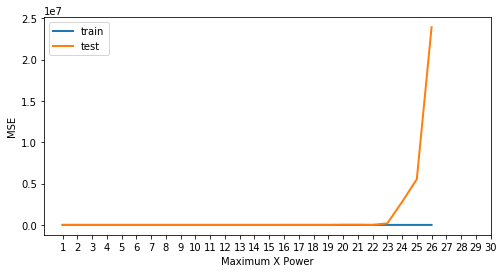

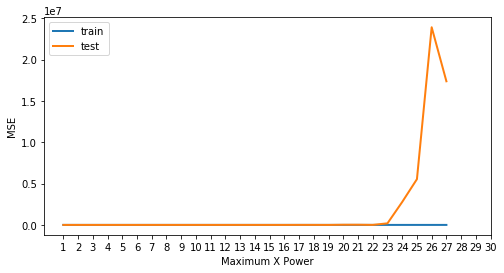

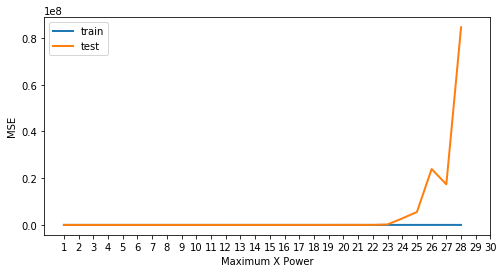

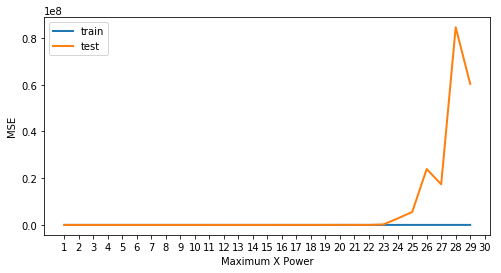

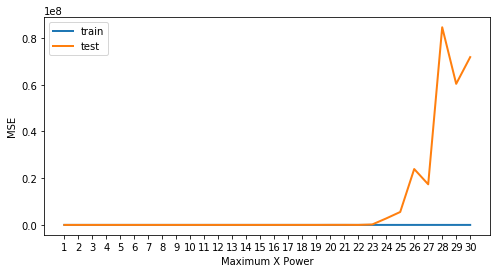

In [122]:
for i in range(1,31):
    fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,4))
    plt.plot(n[0:i],train[0:i],label='train', lw=2)   
    plt.plot(n[0:i],test[0:i],label='test', lw=2)  

    plt.ylabel("MSE")
    plt.xlabel("Maximum X Power")
    plt.xticks(n)

    plt.legend()

    plt.savefig('../figures/poly/mse{}.png'.format(i),format='png',dpi=150)
    




MSE
___
1) Train:3619.0 Test:3809.0


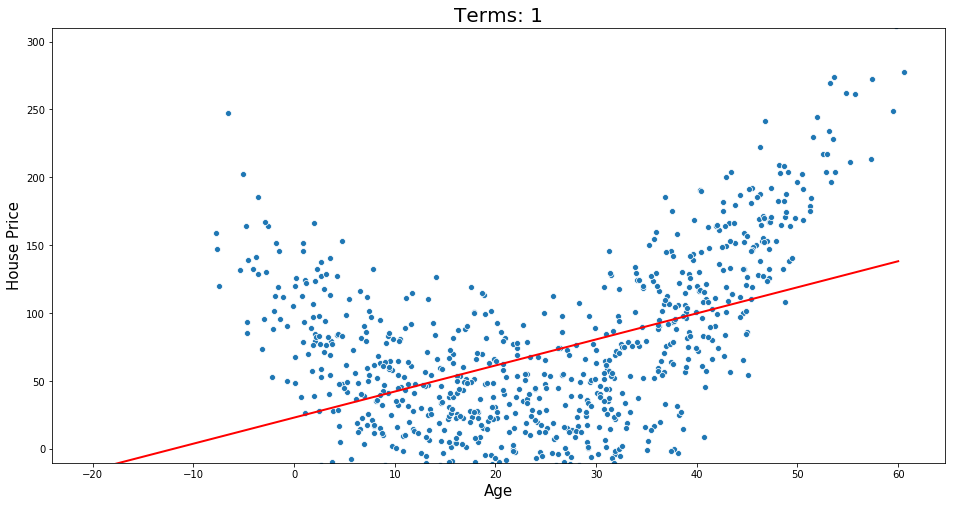

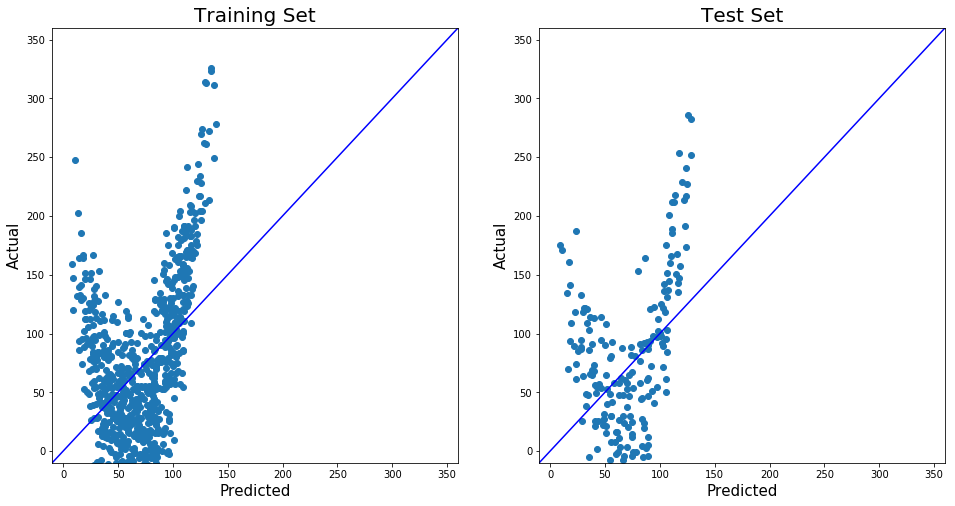

In [316]:
# y = ax+b
x = data['x']
y = data['y']

regression(x,y,1)

614.0 948.0


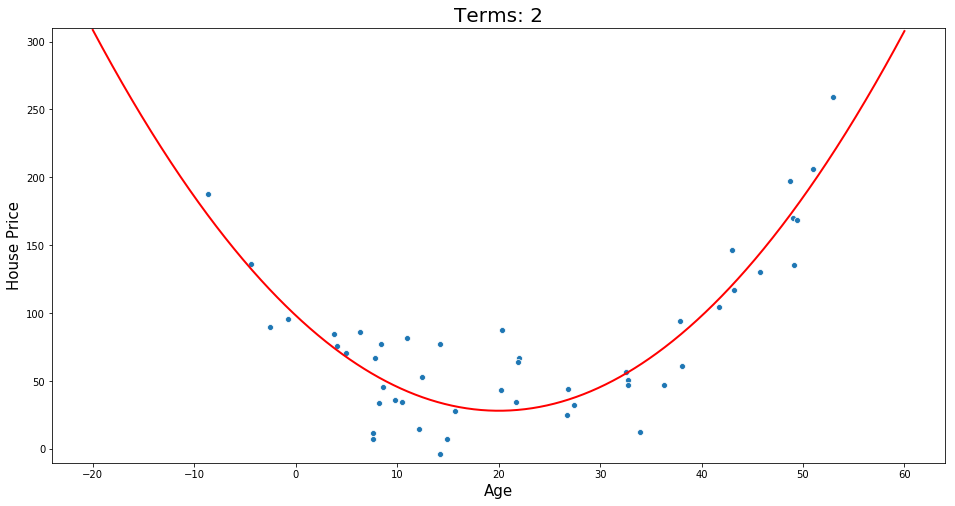

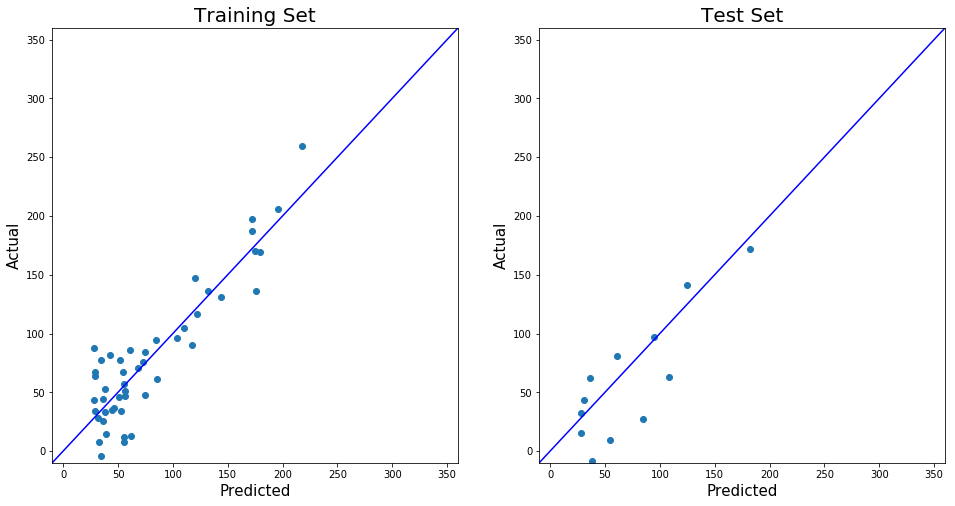

In [296]:
# y = ax^2+bx + c
# y = ax+b
x = data['x']
y = data['y']

model = regression(x,y,2)


3235.0 4951.0
1258.0 2821.0
1243.0 2773.0
1240.0 2745.0
1240.0 2735.0
1164.0 2606.0
1156.0 2698.0
1156.0 2716.0
1879.0 2889.0
3208.0 2904.0
3304.0 3164.0
3325.0 3237.0
3375.0 3301.0
3374.0 3160.0
3445.0 3079.0
3399.0 3073.0
4548.0 3336.0
4762.0 2832.0
4698.0 2963.0
4735.0 2975.0


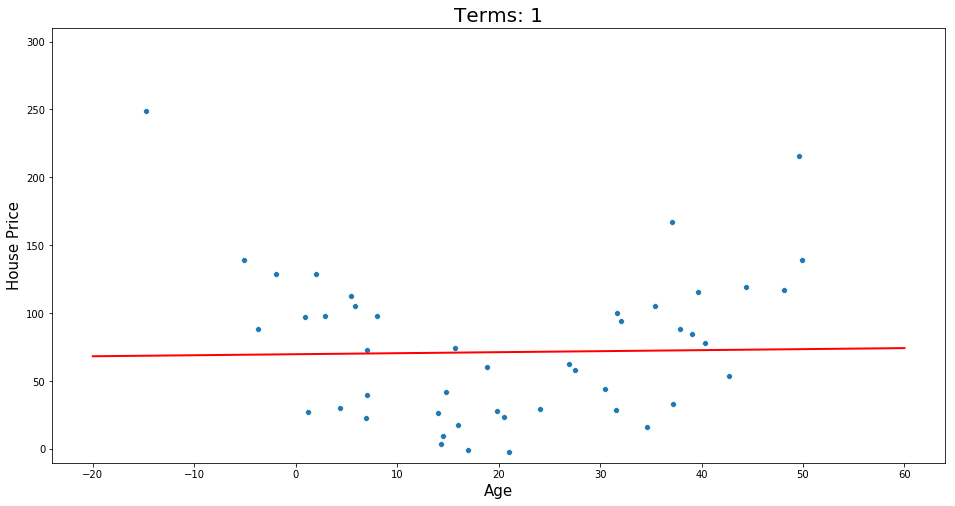

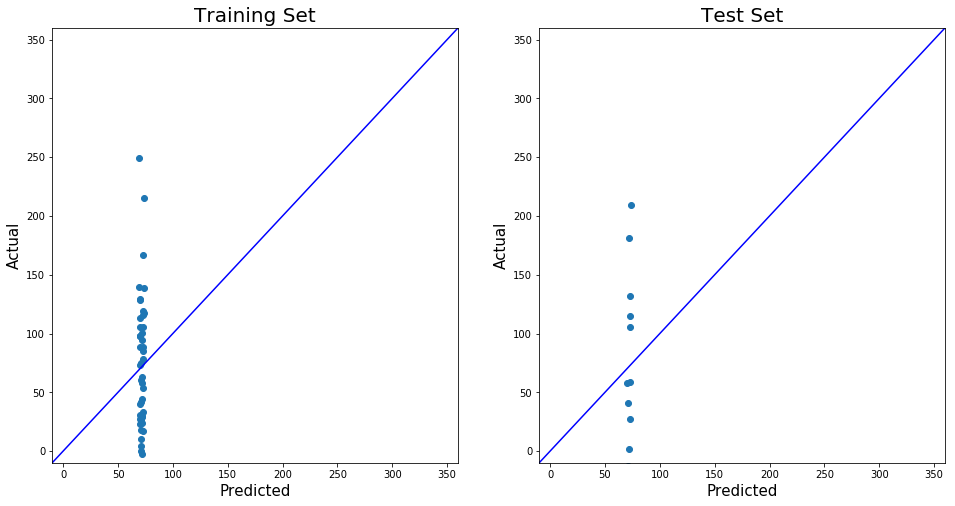

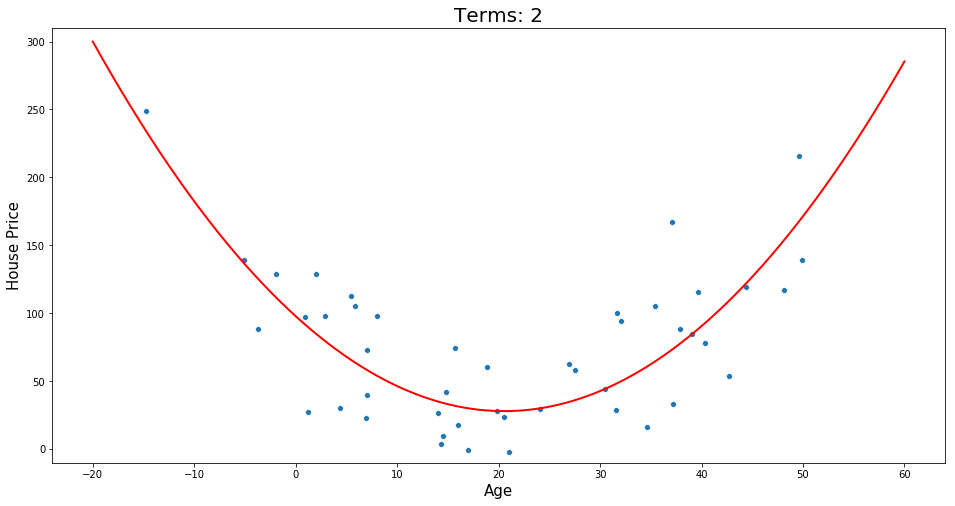

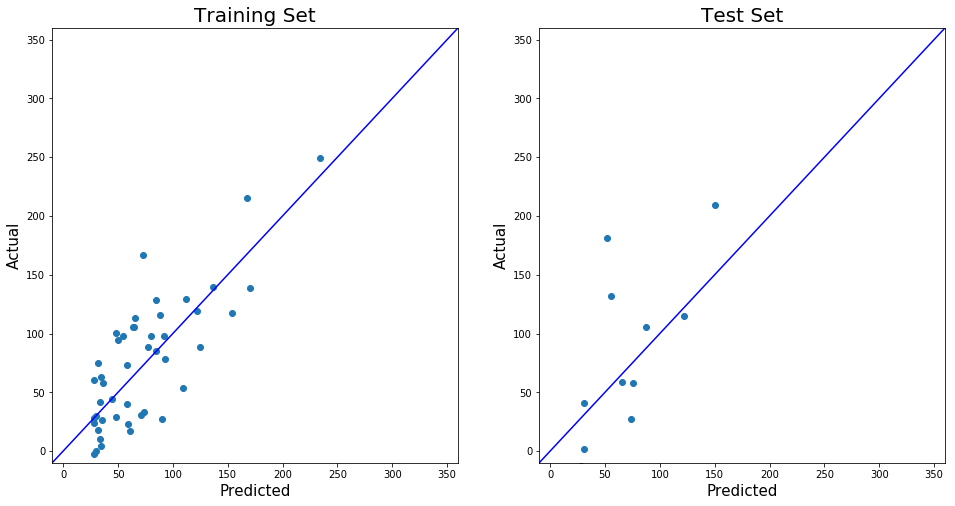

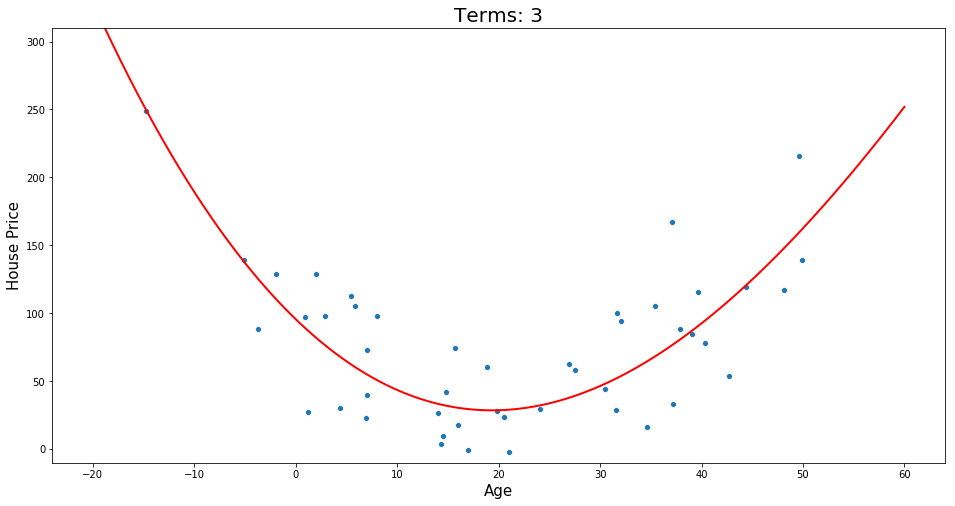

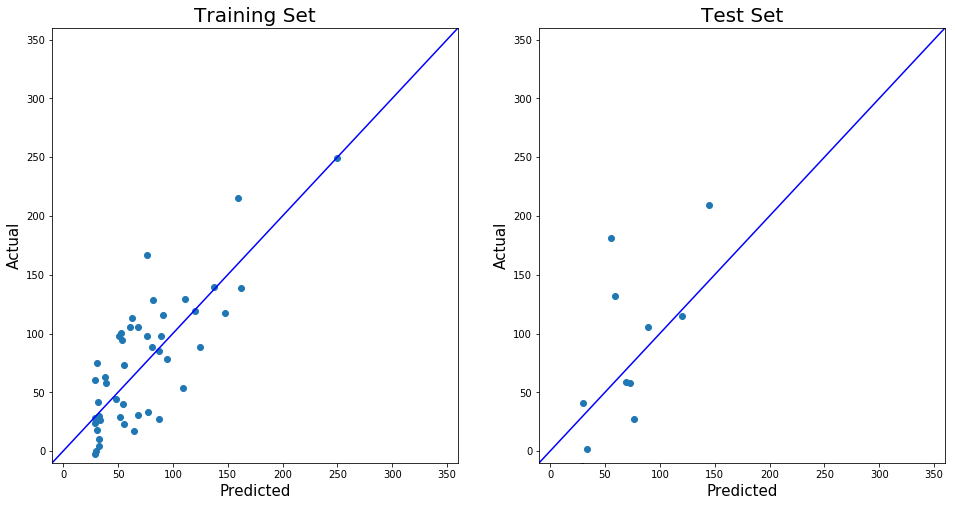

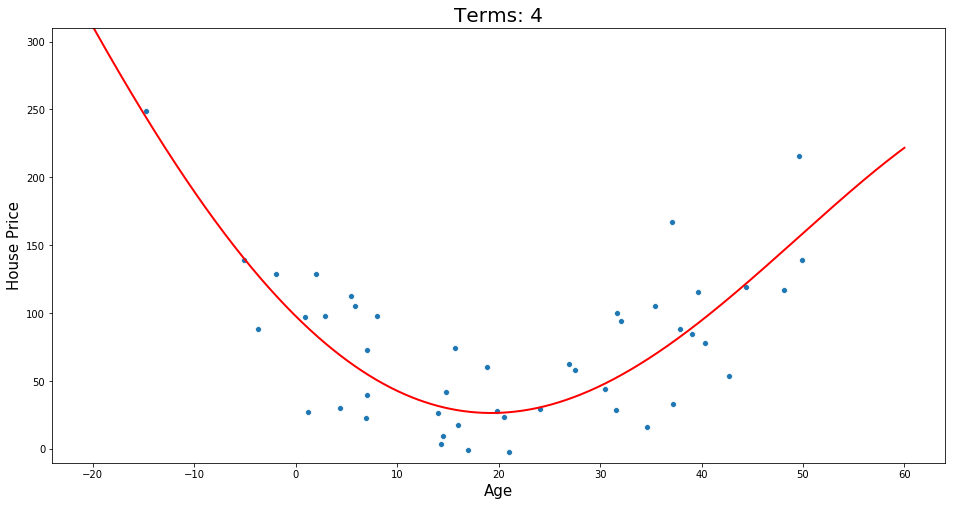

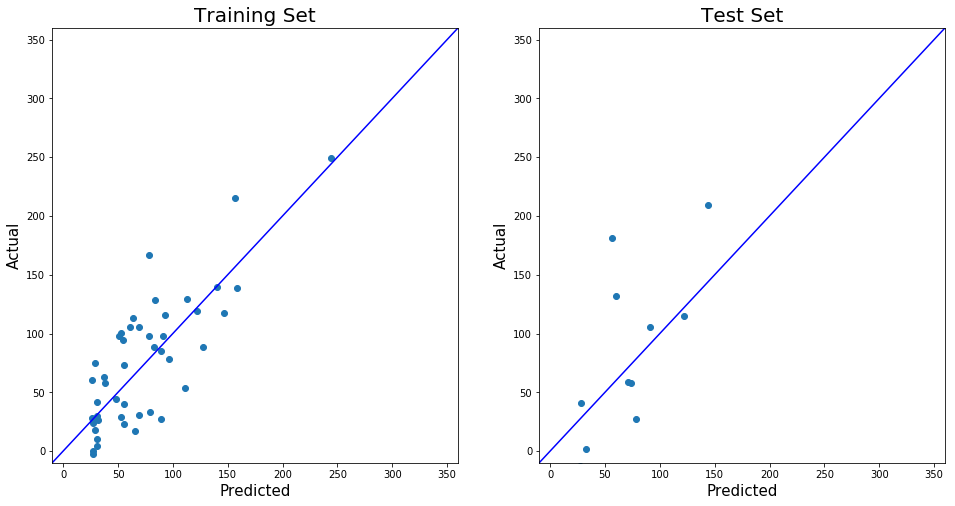

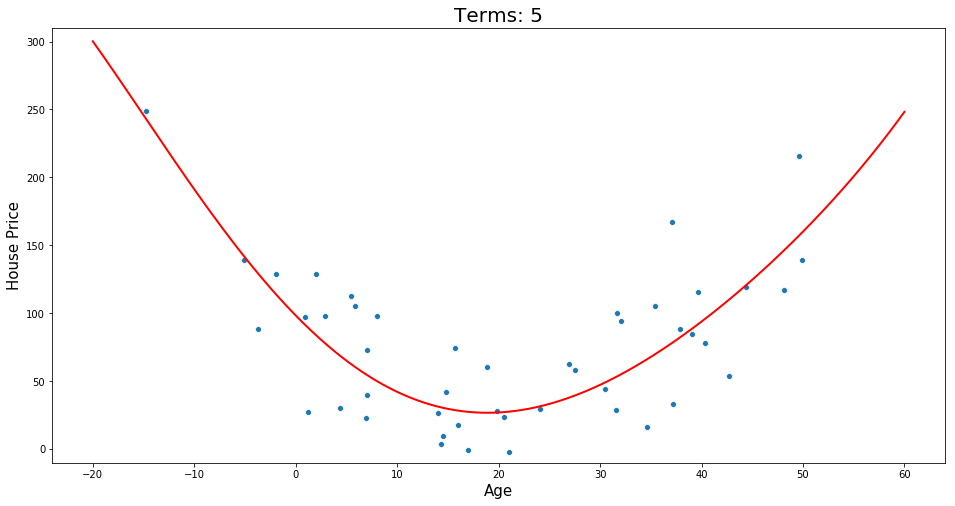

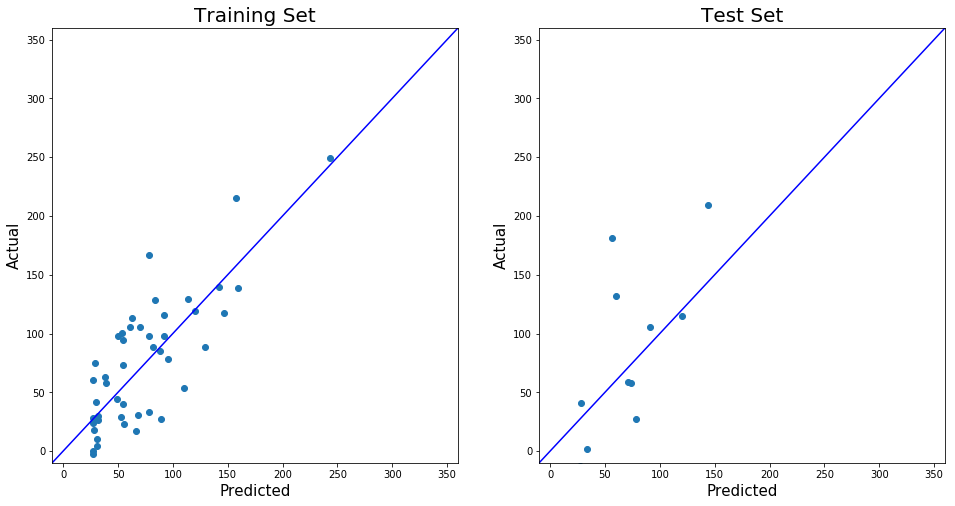

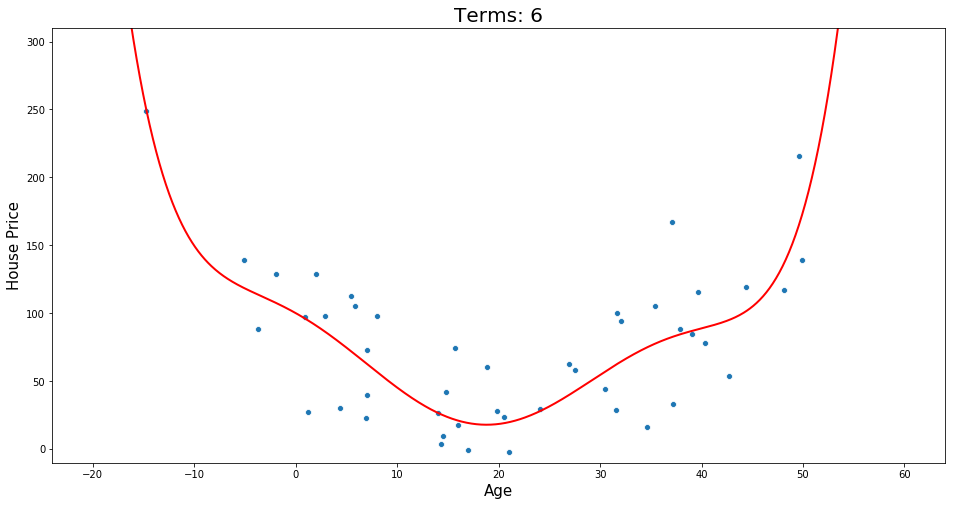

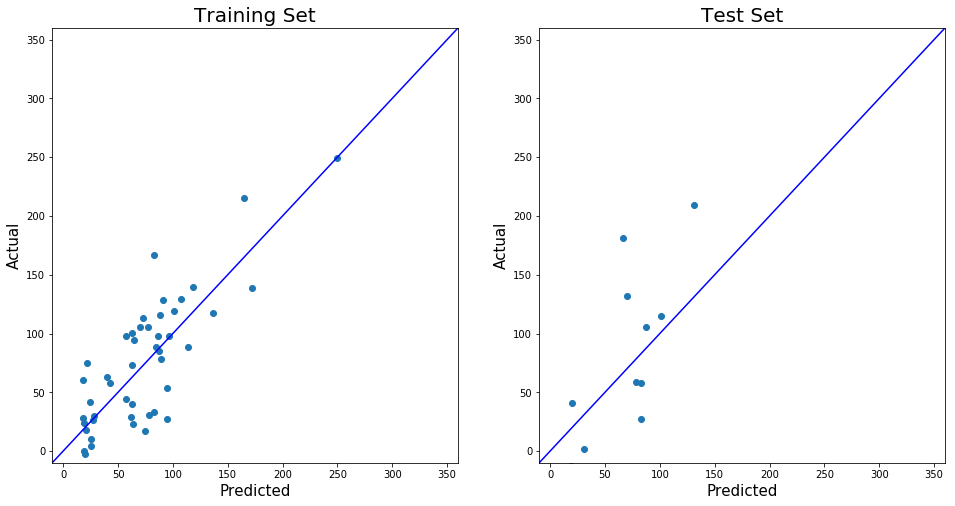

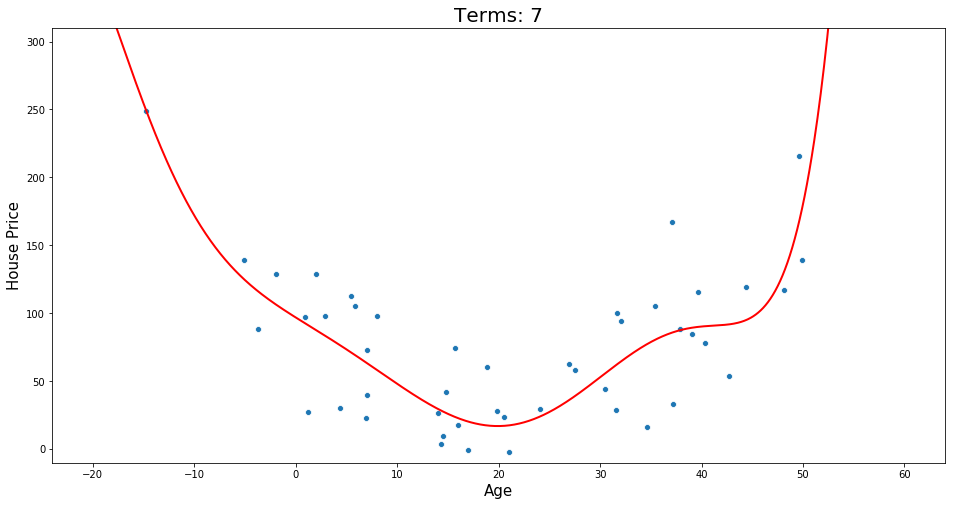

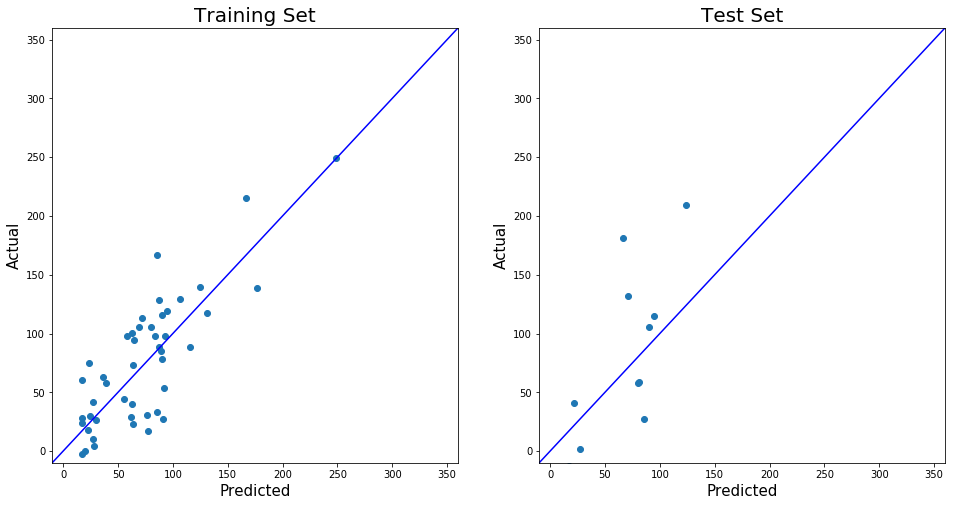

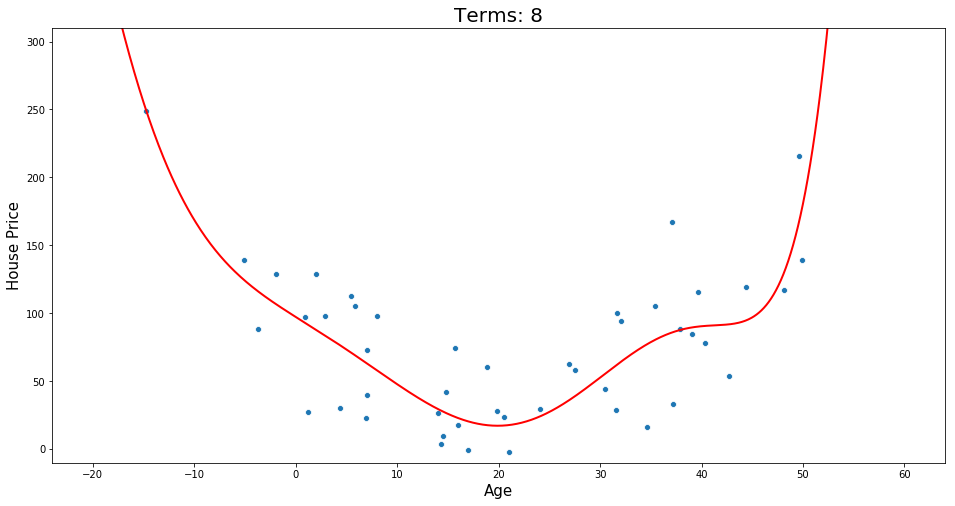

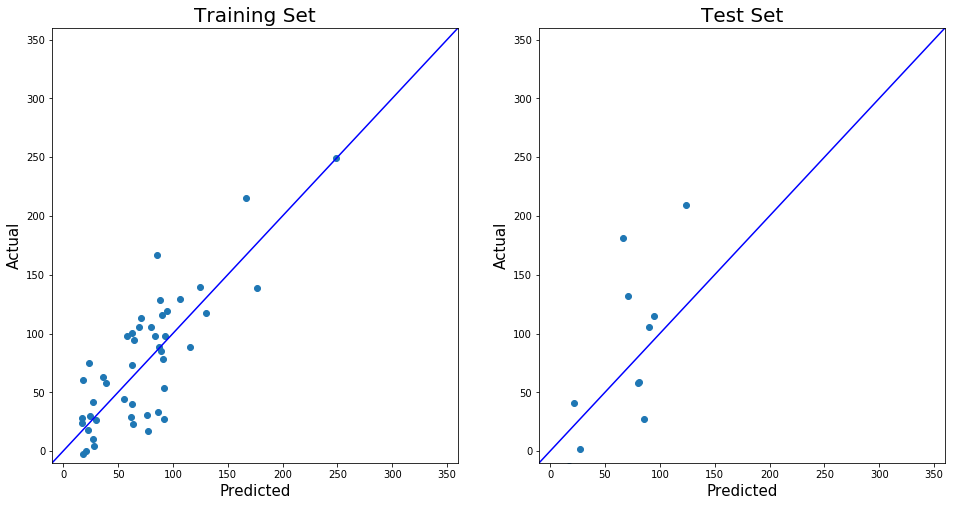

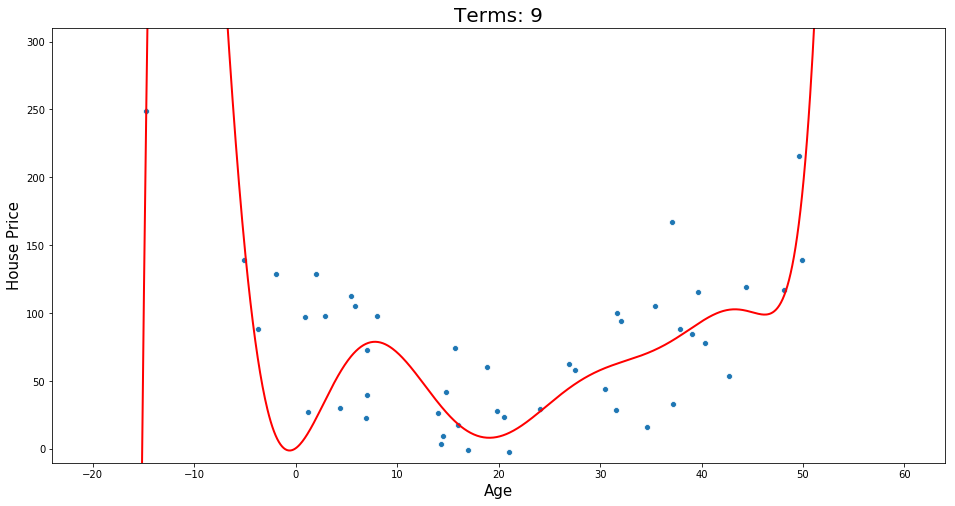

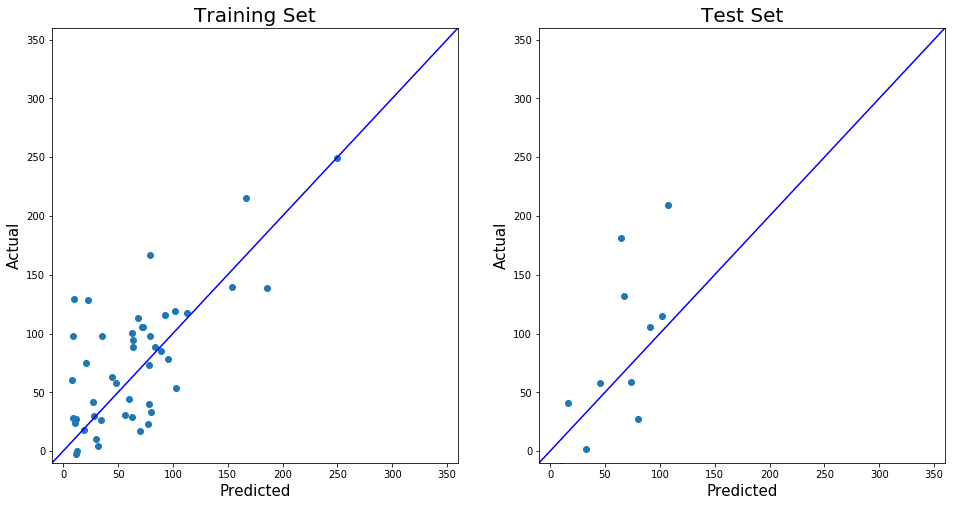

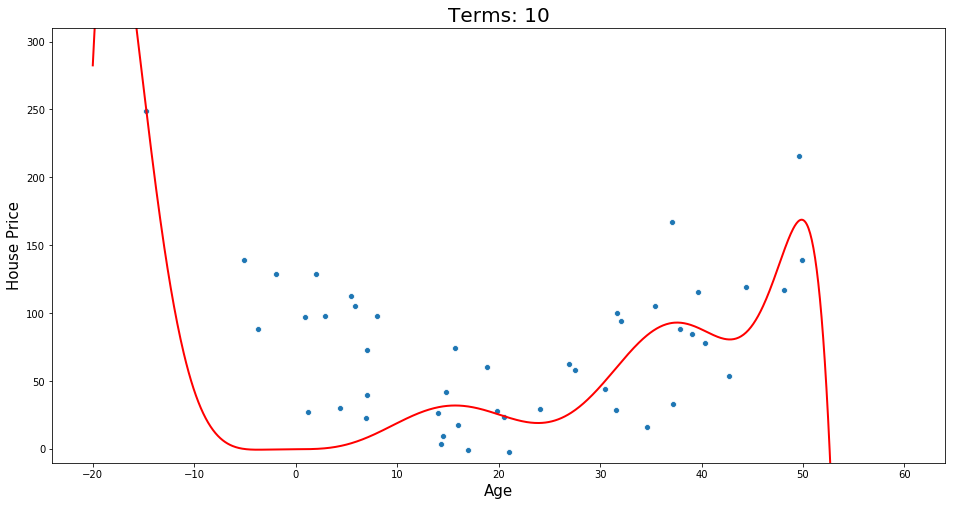

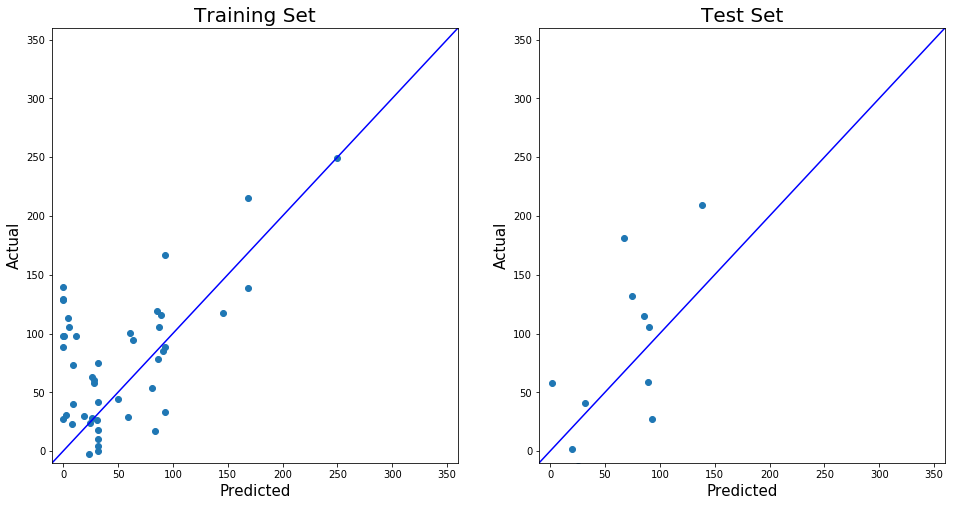

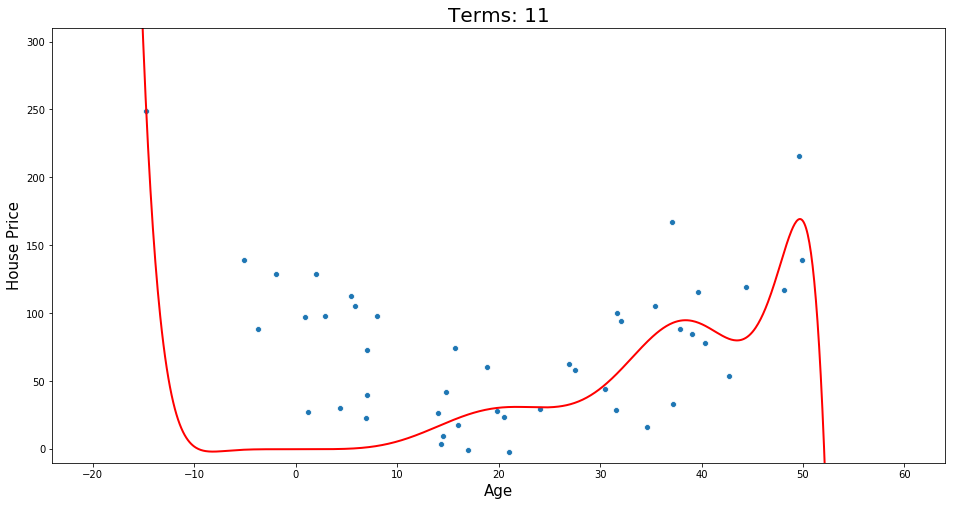

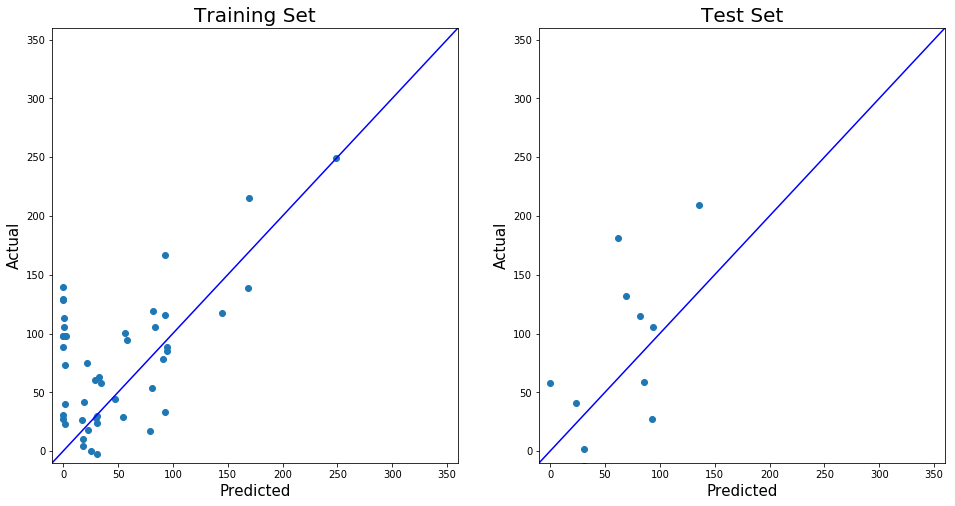

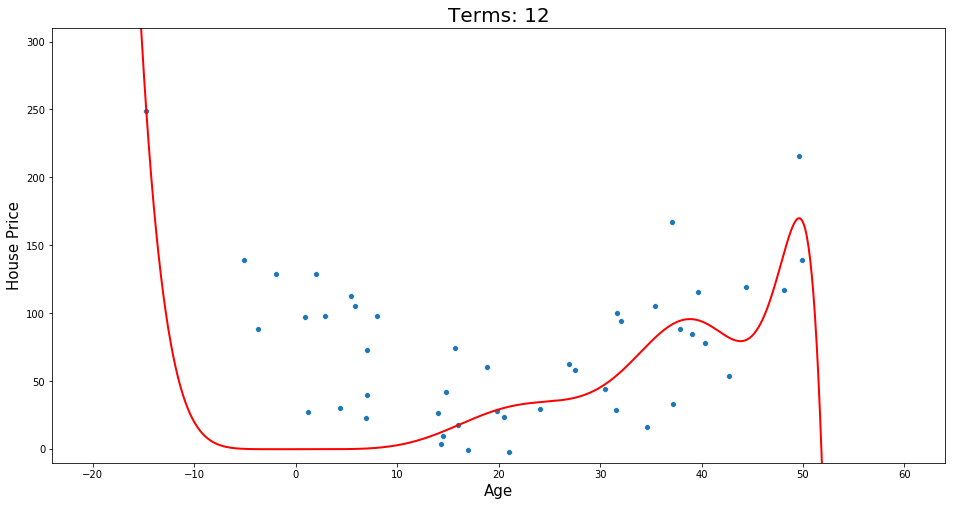

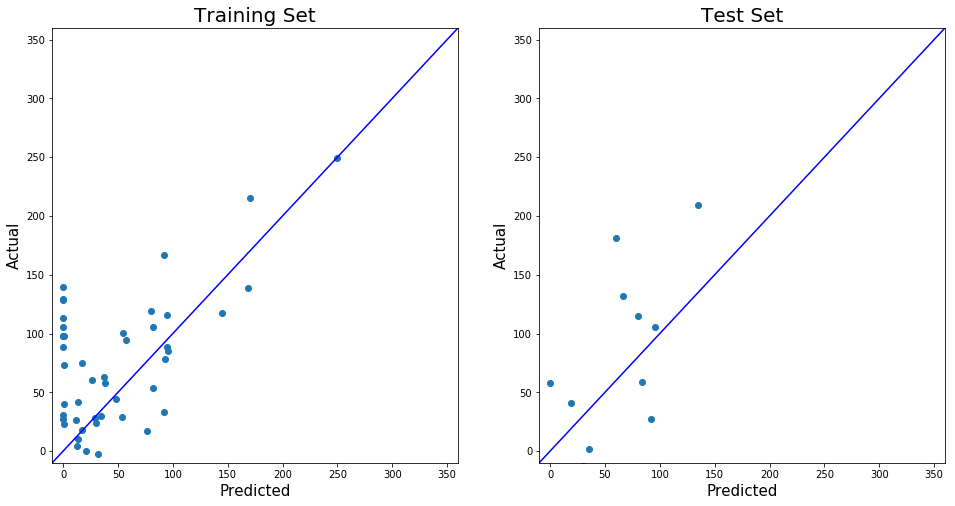

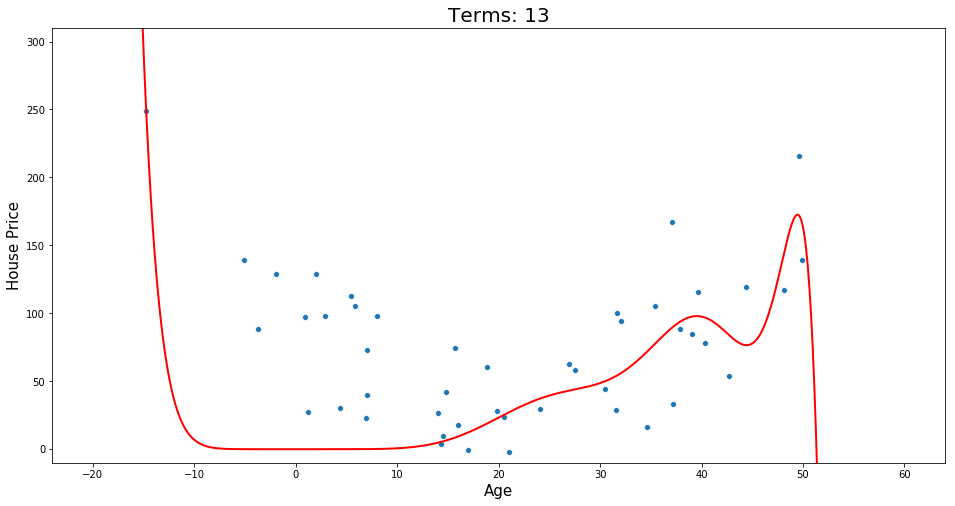

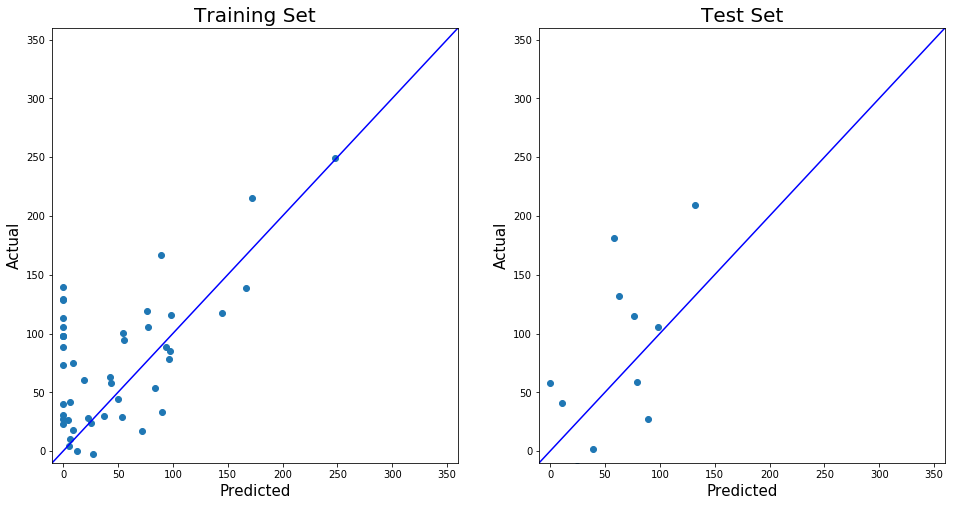

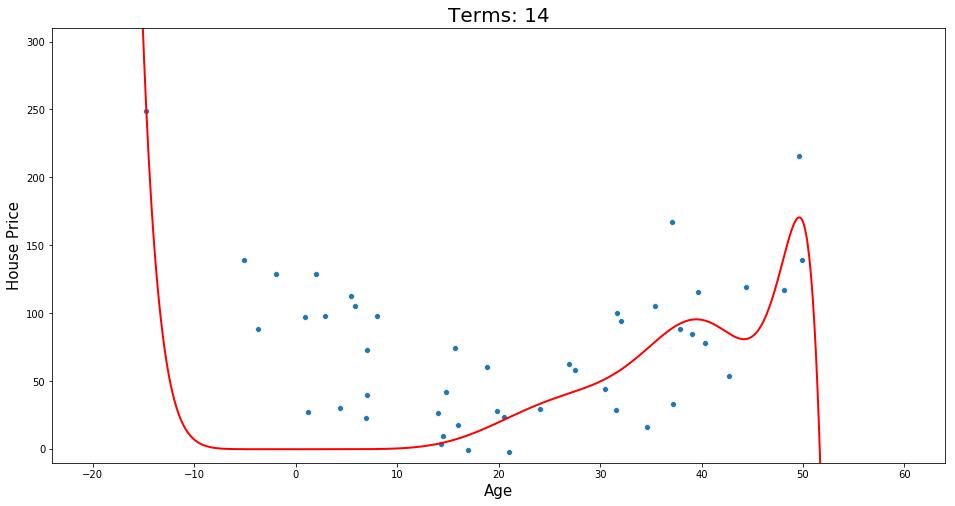

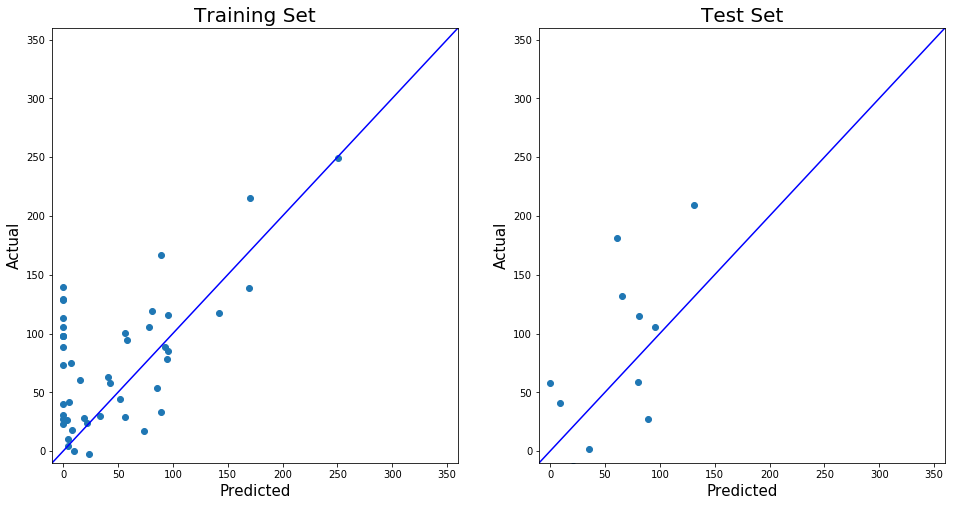

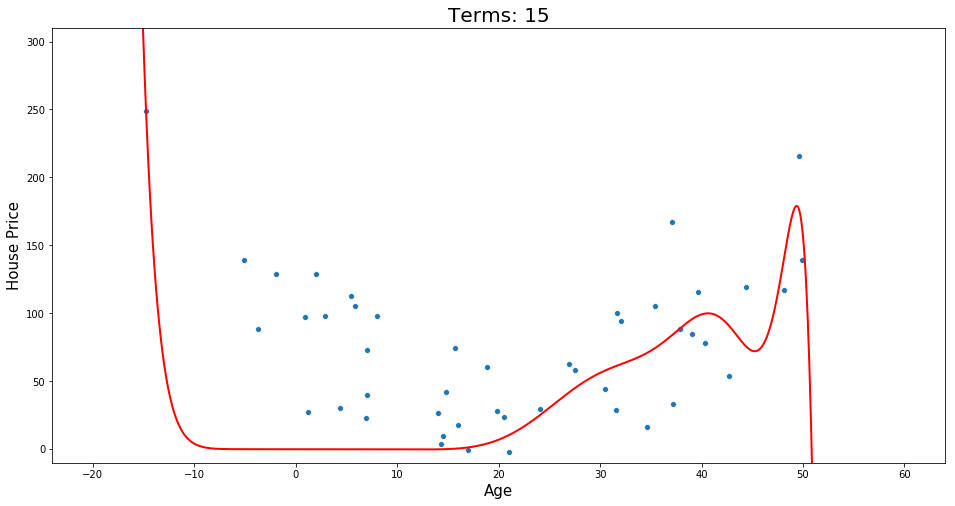

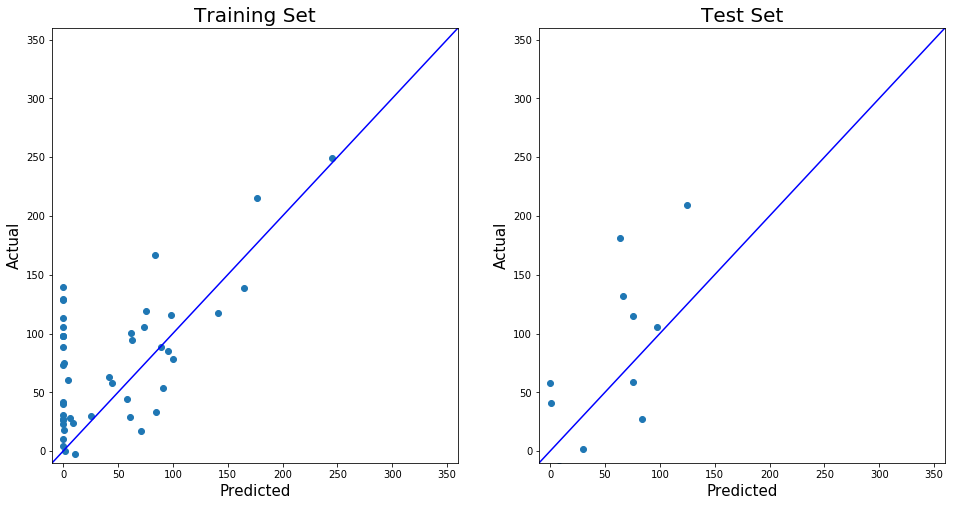

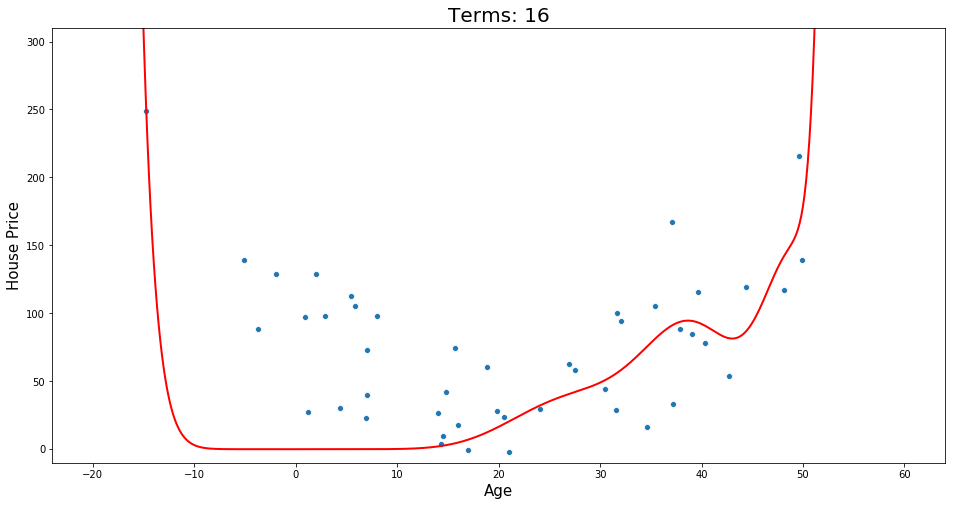

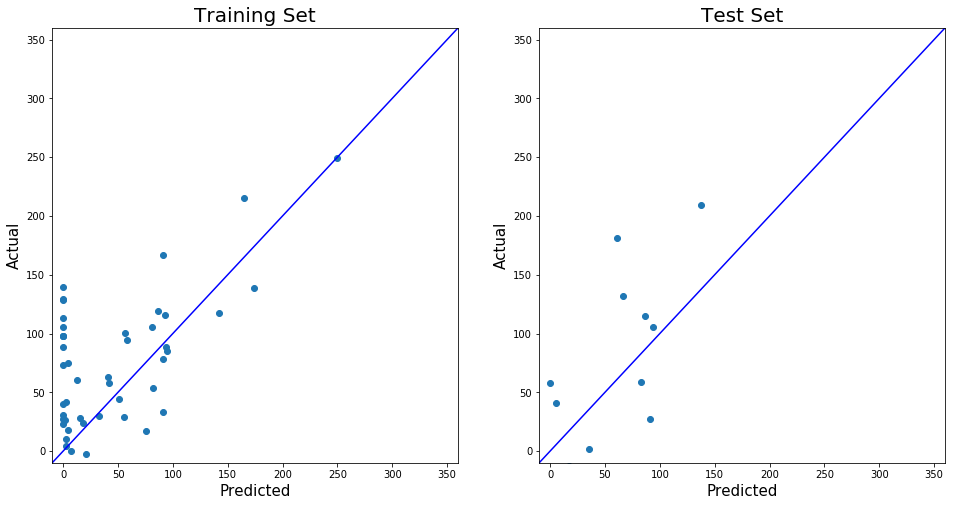

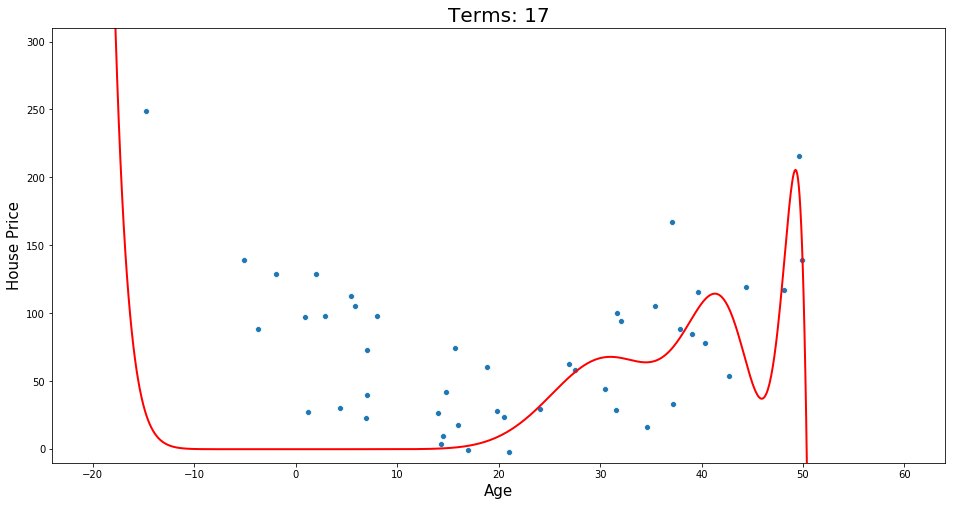

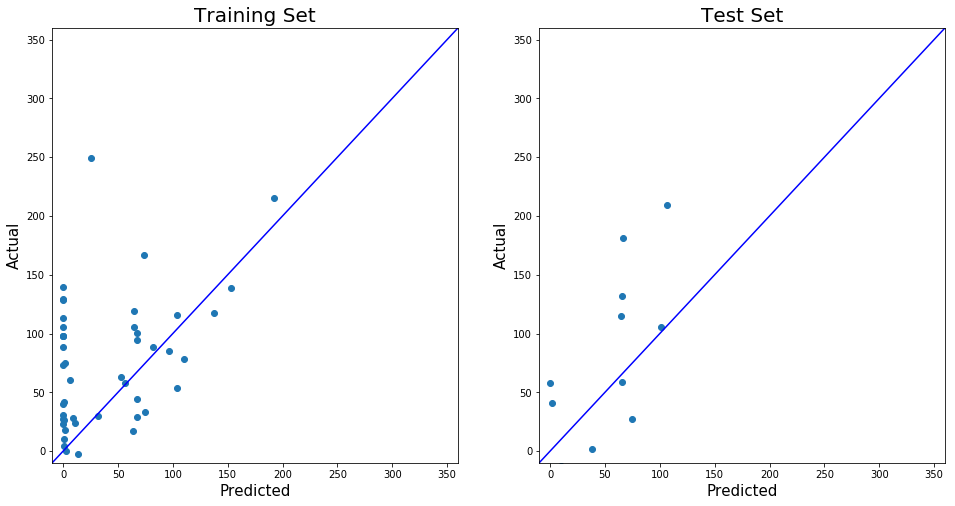

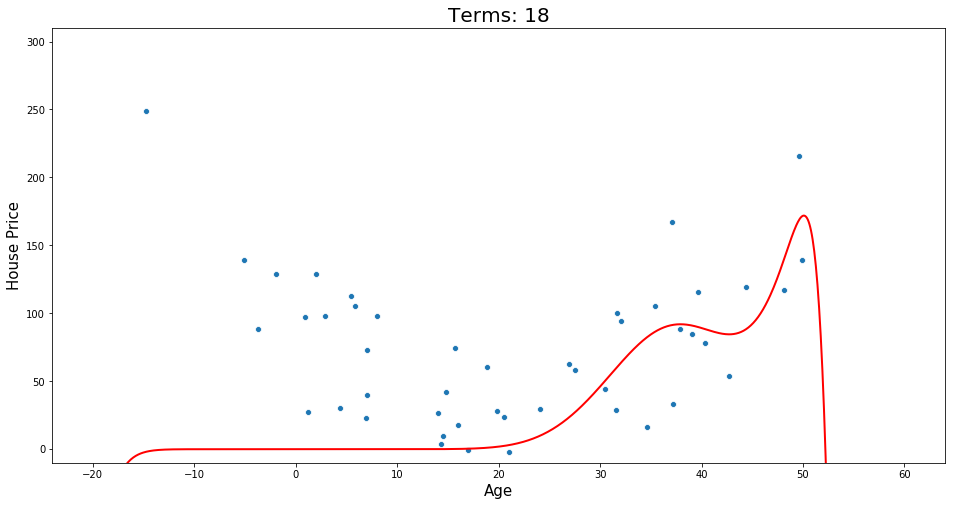

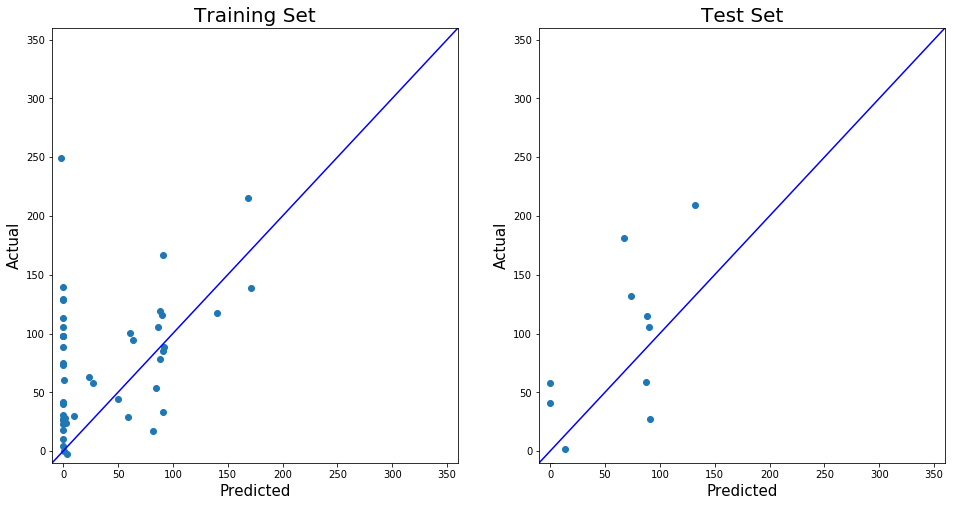

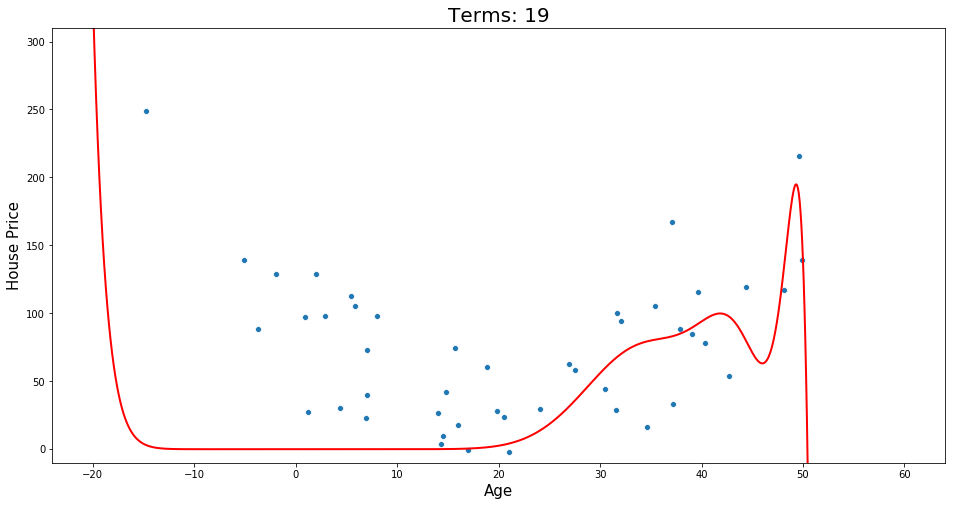

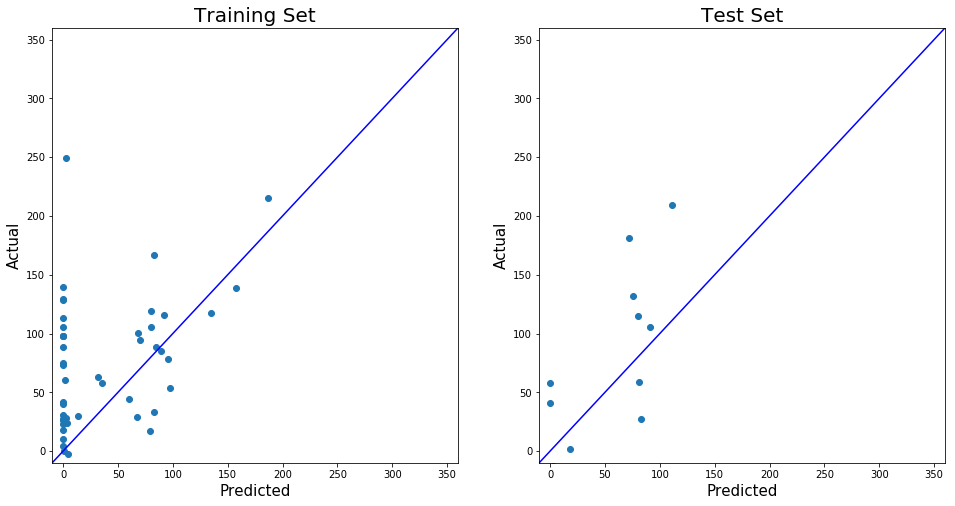

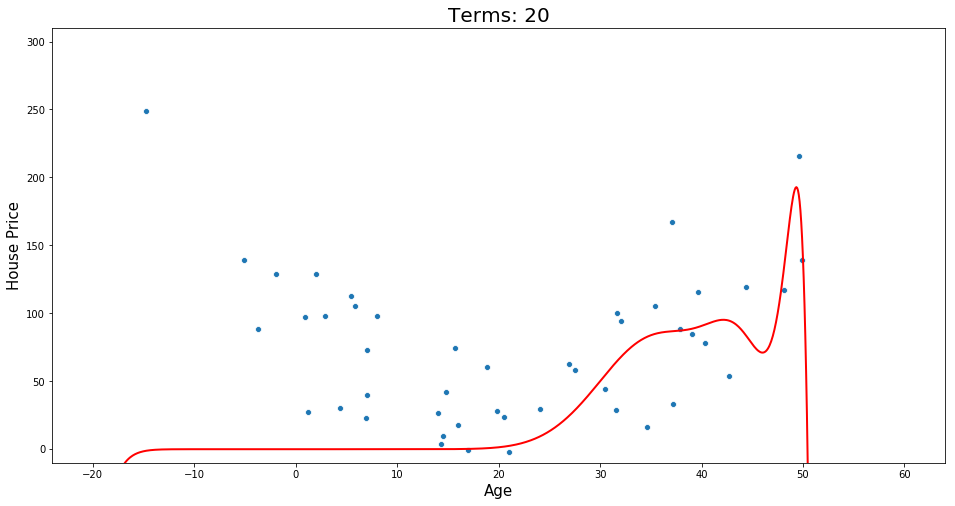

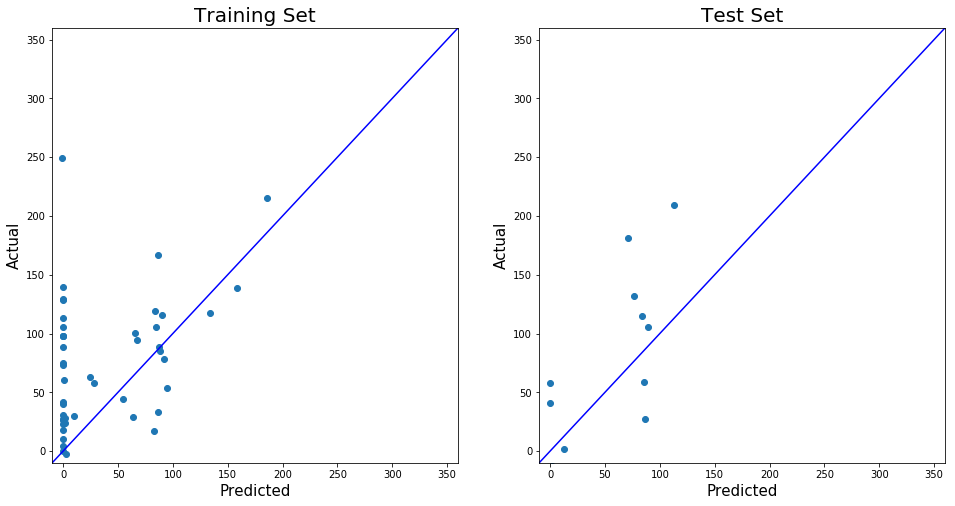

In [306]:
x = data['x']

y = data['y']


for i in range(1,21):
    regression(x,y,i)

1661.0 1902.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     5.863
Date:                Tue, 22 Sep 2020   Prob (F-statistic):           0.000100
Time:                        19:58:08   Log-Likelihood:                -246.08
No. Observations:                  48   AIC:                             508.2
Df Residuals:                      40   BIC:                             523.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.967      0.339      -0.000       0.001
x              0.0006      0.001      0.946      0.350      -0.001       0.002
x2             0.0087      0.009      0.977      0.334      -0.009       0.027
x3             0.0584      0.060      0.973      0.336      -0.063       0.180
x4             0.0075      0.006      1.334      0.190      -0.004       0.019
x5            -0.0020      0.001     -3.834      0.000      -0.003      -0.001
x6             0.0002   7.04e-05      2.220      0.032     1.4e-05       0.000
x7         -5.915e-06   3.45e-06     -1.713      0.094   -1.29e-05    1.06e-06
x8          1.223e-07   8.36e-08      1.464      0.151   -4.66e-08    2.91e-07
x9         -1.324e-09   1.01e-09     -1.317      0.195   -3.36e-09    7.08e-10
x10         5.879e-12   4.81e-12      1.222      0.229   -3.84e-12    1.56e-11
==============================================================================
Omnibus:                        9.148   Durbin-Watson:                   1.623
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                8.345
Skew:                           0.920   Prob(JB):                       0.0154
Kurtosis:                       3.885   Cond. No.                     3.04e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.04e+17. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

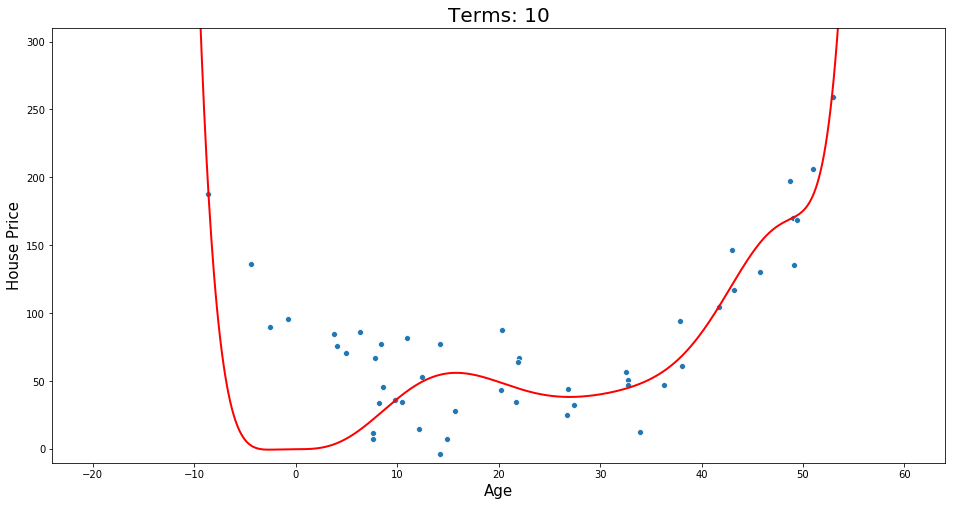

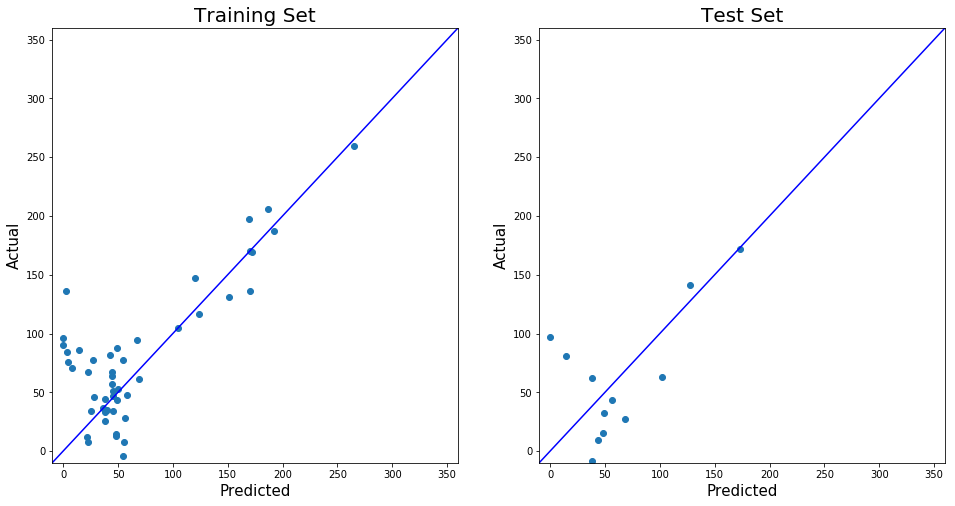

In [300]:
model = regression(x,y,10)
model.summary()

In [138]:
#Load the dataset
data = pd.read_csv("../data/Real estate valuation data set .csv",index_col=0)

print("Number of rows: {}".format(len(data)))
data.head(10)

Number of rows: 414


X1 transaction date  X2 house age  X3 distance to the nearest MRT station  \
No                                                                              
1              2012.917          32.0                                84.87882   
2              2012.917          19.5                               306.59470   
3              2013.583          13.3                               561.98450   
4              2013.500          13.3                               561.98450   
5              2012.833           5.0                               390.56840   
6              2012.667           7.1                              2175.03000   
7              2012.667          34.5                               623.47310   
8              2013.417          20.3                               287.60250   
9              2013.500          31.7                              5512.03800   
10             2013.417          17.9                              1783.18000   

    X4 number of convenience stores  X5 latitude  X6 longitude  \
No                                                               
1                                10     24.98298     121.54024   
2                                 9     24.98034     121.53951   
3                                 5     24.98746     121.54391   
4                                 5     24.98746     121.54391   
5                                 5     24.97937     121.54245   
6                                 3     24.96305     121.51254   
7                                 7     24.97933     121.53642   
8                                 6     24.98042     121.54228   
9                                 1     24.95095     121.48458   
10                                3     24.96731     121.51486   

    Y house price of unit area  
No                              
1                         37.9  
2                         42.2  
3                         47.3  
4                         54.8  
5                         43.1  
6                         32.1  
7                         40.3  
8                         46.7  
9                         18.8  
10                        22.1

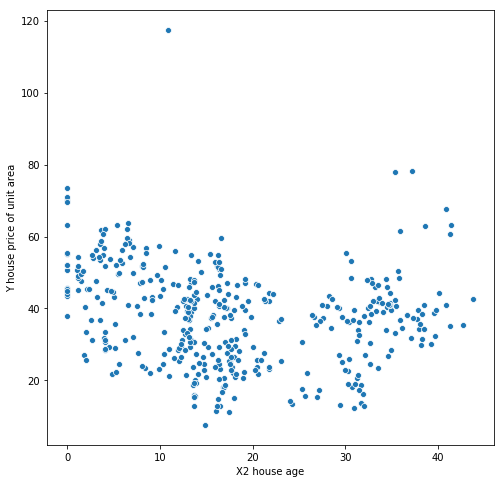

In [139]:
#For simplicity we will only consider 2 variables: house age and number of convenience stores
X = data['X2 house age']
Y = data['Y house price of unit area']

#Relationship with explanatory variables
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,8))
sns.scatterplot(y = Y,x = X )


In [140]:
x = data[['X2 house age']]
x = sm.add_constant(X)
y = np.log(data['Y house price of unit area'])

model = sm.OLS(y,x).fit()

#model.summary()

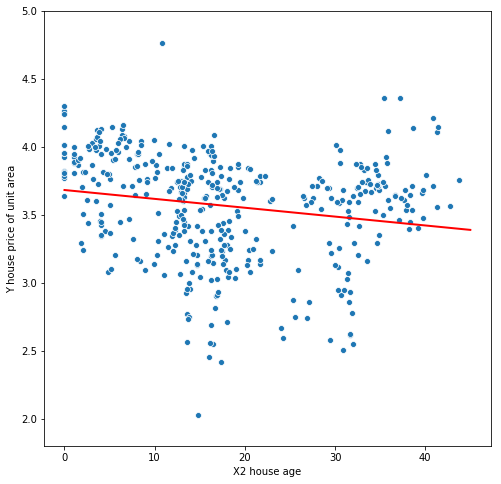

In [141]:
fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(8,8))
plt.ylim(1.8, 5)
sns.scatterplot(y=y,x=x['X2 house age'])

x1 = np.linspace(0, 45, 1000)
x_plot = pd.DataFrame(data=x1, columns=["x"])
x_plot = sm.add_constant(x_plot)

y_plot = model.predict(x_plot)

plt.plot(x_plot['x'],y_plot, 'r-', lw=2)


#plt.plot([0, 40],[3.6822, 40*(-0.0065)+3.6822], 'r-', lw=2)

In [142]:
X = data[['X2 house age']]
X['x2'] = X['X2 house age']**2
X = sm.add_constant(X)
Y = np.log(data['Y house price of unit area'])

model = sm.OLS(Y,X).fit()

#model.summary()

/Users/conorosully/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


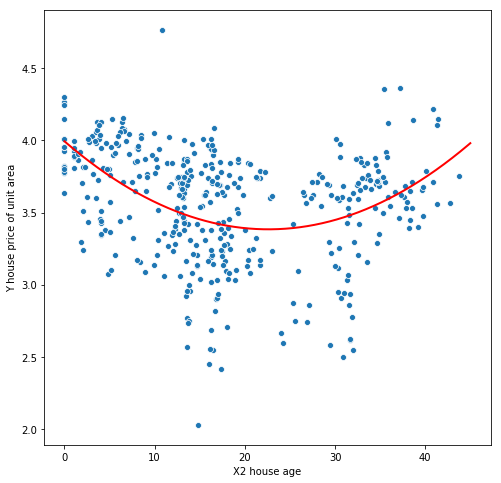

In [143]:
fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(8,8))
sns.scatterplot(y = Y,x = X['X2 house age'] )

x_plot['x2'] = x_plot['x']**2

x_plot

# calculate the y value for each element of the x vector
#y = 0.0012*x**2 - 0.0539*x + 3.9934 
y_plot = model.predict(x_plot)

plt.plot(x_plot['x'],y_plot, 'r-', lw=2)

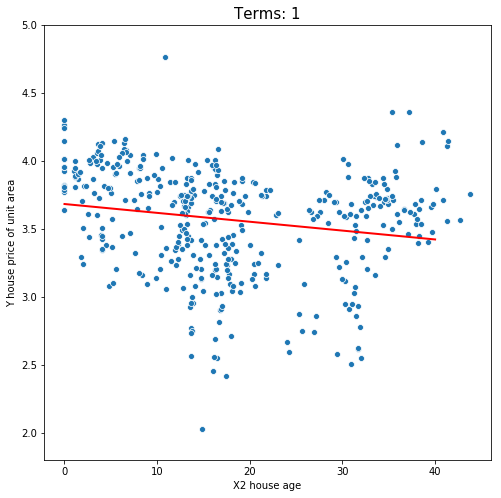

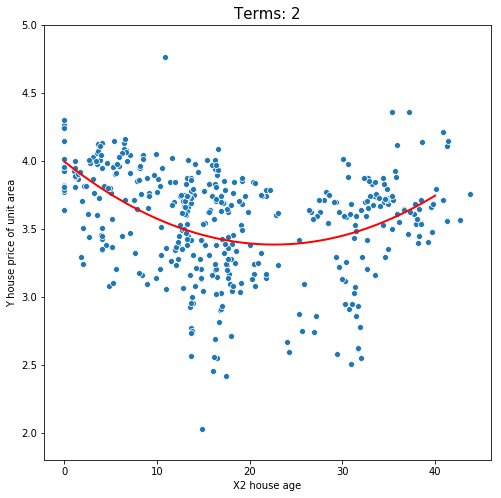

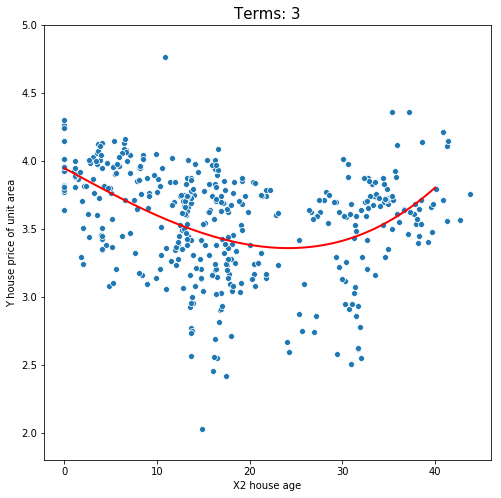

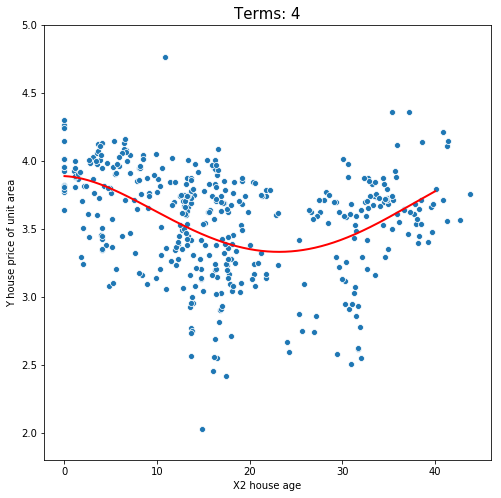

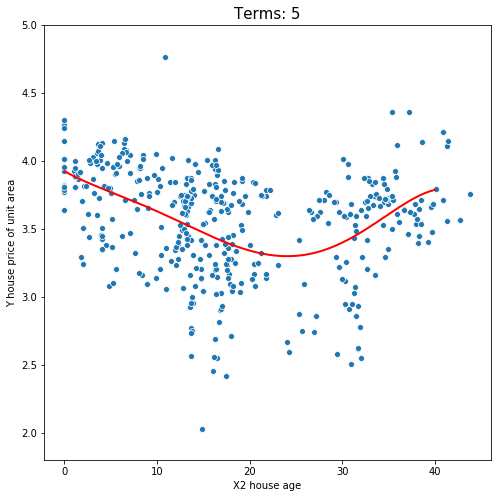

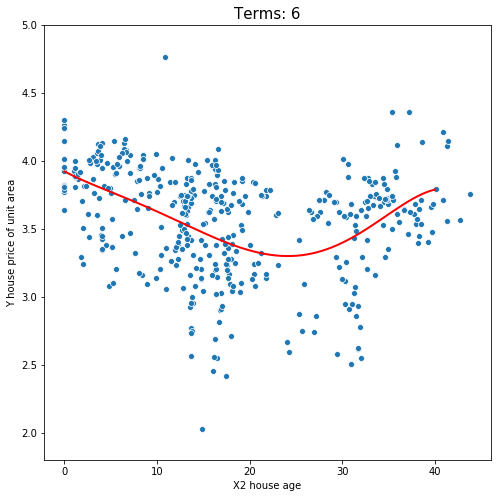

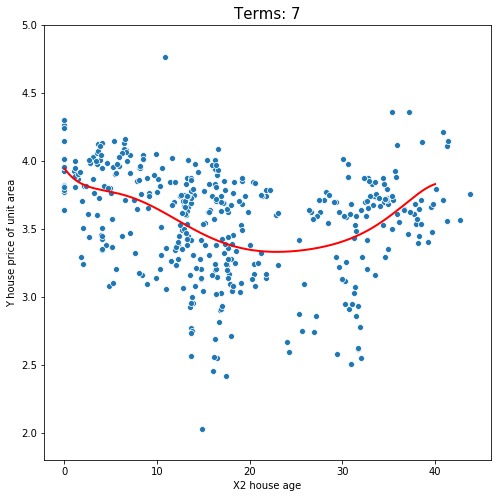

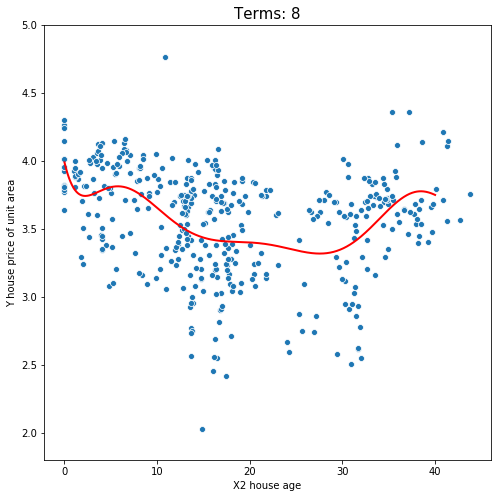

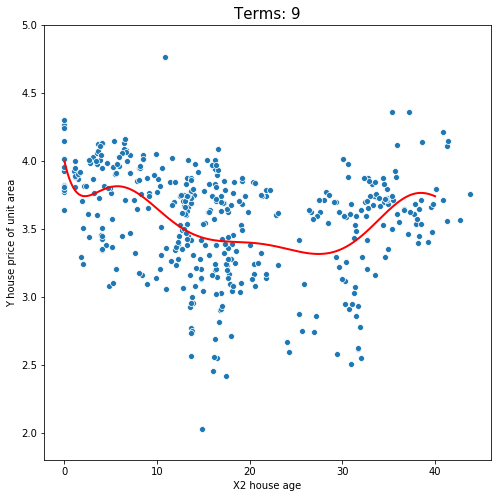

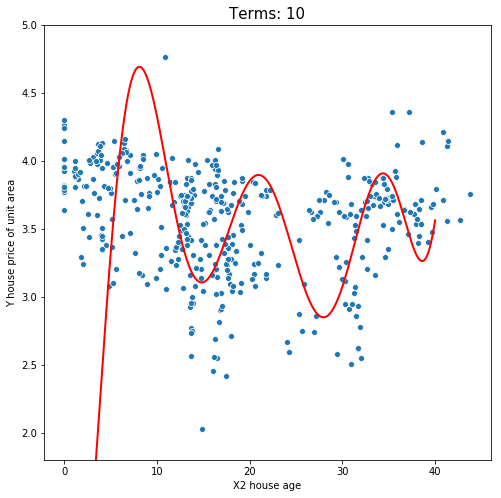

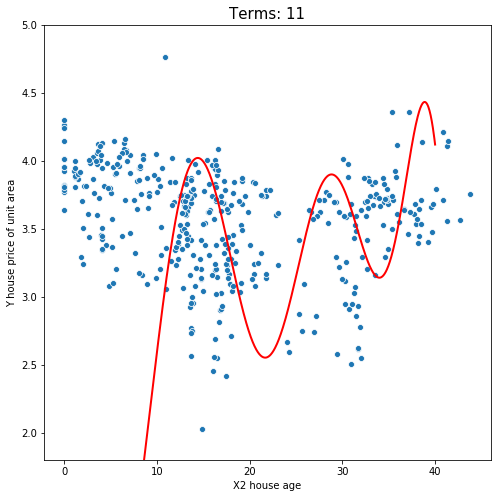

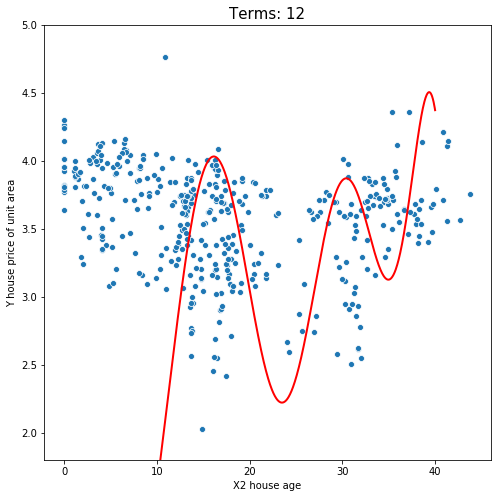

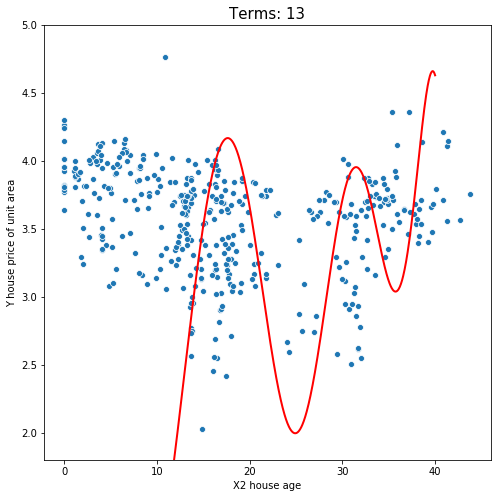

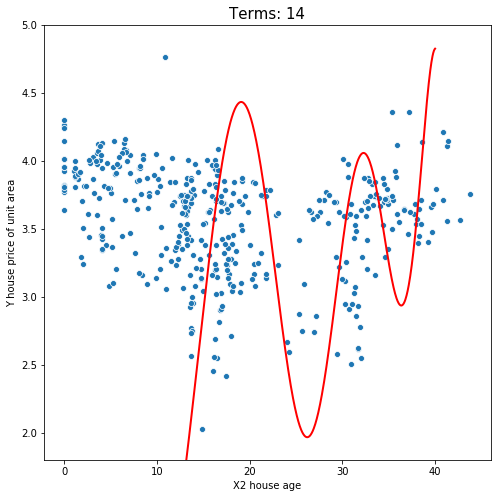

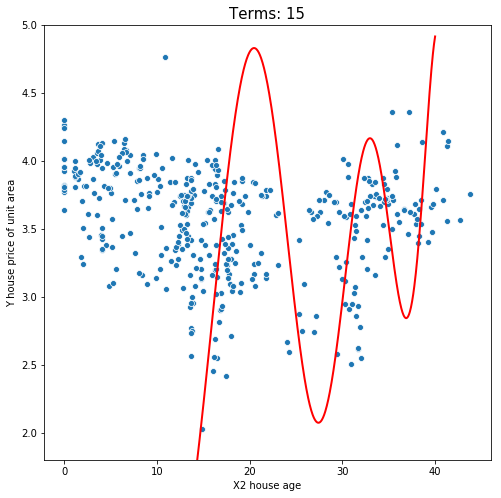

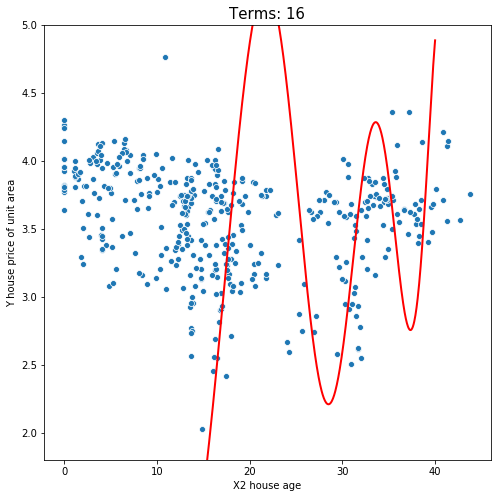

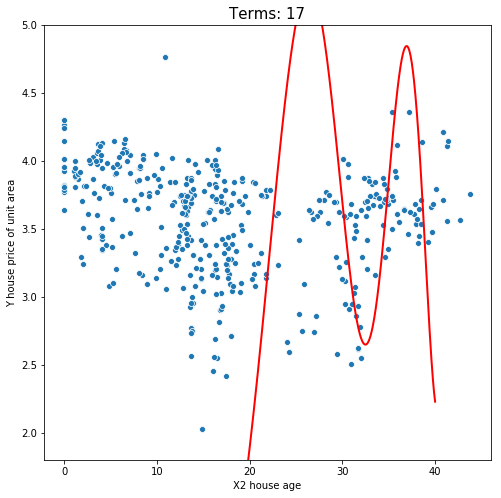

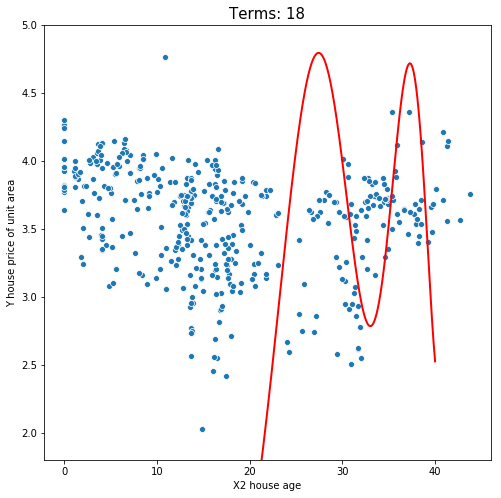

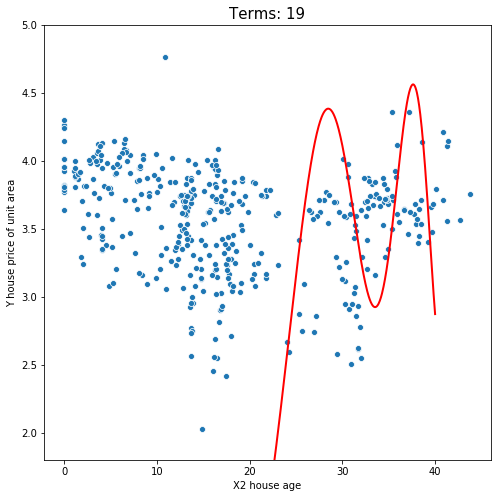

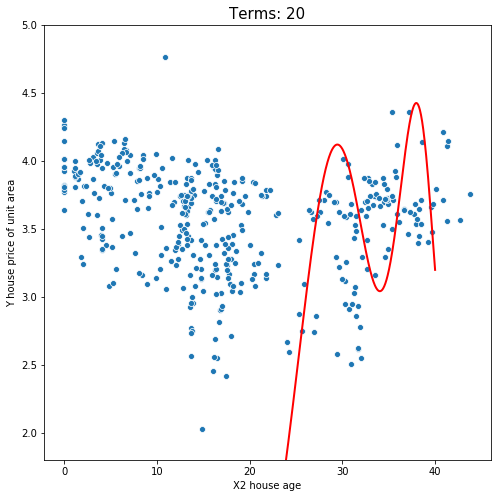

In [144]:
x = data[['X2 house age']]
x = sm.add_constant(x)
y = np.log(data['Y house price of unit area'])


x1 = np.linspace(0, 40, 1000)
x_plot = pd.DataFrame(data=x1, columns=["x"])
x_plot = sm.add_constant(x_plot)


for i in range(1,21):
    if i != 1:
        x['x{}'.format(i)] = x['X2 house age']**i
        
        x_plot['x{}'.format(i)] = x_plot['x']**i

    #fit model 
    model = sm.OLS(y,x).fit()

    #get predictions 
    y_plot = model.predict(x_plot)
    
    
    fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(8,8))
    plt.ylim(1.8, 5)
    plt.title('Terms: {}'.format(i),size =15)
    sns.scatterplot(y=y,x=x['X2 house age'])

    plt.plot(x_plot['x'],y_plot, 'r-', lw=2)
    plt.savefig('../figures/poly/plot{}.png'.format(i),format='png', dpi=150)


# ARCHIVE

In [ ]:
#Generate data
a = 10
#b = int(a/5)
'''x = [max(0,x) for x in np.linspace(0, 50, a)+ 5*np.random.randn(a)]+ [
    max(0,x) for x in np.linspace(0, 40, a)+ 5*np.random.randn(a)]+ [
    max(0,x) for x in np.linspace(0, 30, a)- abs(5*np.random.randn(a))]+ [
    max(0,x) for x in np.linspace(0, 20, a)- abs (5*np.random.randn(a))]+ [
    max(0,x) for x in np.linspace(0, 10, a)-  abs(5*np.random.randn(a))]+ [
    max(0,x) for x in np.linspace(0, 5, a)-abs (5*np.random.randn(a))] '''
x = [x for x in np.linspace(0, 50, a)+ 5*np.random.randn(a)]+ [
    x for x in np.linspace(0, 50, a)+ 5*np.random.randn(a)]+ [
    x for x in np.linspace(0, 50, a)- abs(5*np.random.randn(a))]+ [
    x for x in np.linspace(0, 50, a)- abs (5*np.random.randn(a))]+ [
    x for x in np.linspace(0, 50, a)-  abs(5*np.random.randn(a))]+ [
    x for x in np.linspace(0, 50, a)-abs (5*np.random.randn(a))] 

x = np.array(x)

#noise = abs((60-x)*np.random.randn(a*6))+ 50*np.random.randn(a*6)
noise = 40*np.random.randn(a*6)

#y = (3/16)*x**(2)-(15/2)*x+100 + noise



#y = [max(5,y+50) for y in y]

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(16,8))
sns.scatterplot(y = y,x = x)

data = pd.DataFrame(data=x, columns=["x"])
data['y'] = y